In [627]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.ensemble
import sklearn.feature_selection
import sklearn.linear_model
import sklearn.model_selection
import sklearn.tree
import sklearn.utils
import sklearn
from copy import deepcopy
pd.set_option('display.max_columns', None)

In [628]:
from sklearn.utils import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")

In [629]:
orig_df = pd.read_csv('./data/all_data_CLEAN.csv')
## Converting columns that were numerical but should be strings (categorical)
orig_df['MSSubClass'] = orig_df['MSSubClass'].astype(str)
orig_df['OverallQual'] = orig_df['OverallQual'].astype(str)
orig_df['OverallCond'] = orig_df['OverallCond'].astype(str)


test_df = orig_df.copy()
test_df
dbl = test_df

### Separating out features by numeric, categorical and ordinal

In [630]:
col_list = list(test_df.columns)

In [631]:
ordinal =  ['LotShape', 'LandSlope', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence']

In [632]:
org_cat_cols = ['PID', 'MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

In [633]:
cat_cols = list(set(org_cat_cols)-set(ordinal))

In [634]:
numer_cols = list(set(test_df.columns) - set(test_df[cat_cols].columns) - set(ordinal))
numer_cols.remove('SalePricePerGLA')

### Splitting target variables to find best predictor

In [635]:
y = test_df['SalePrice']
y_psf = test_df['SalePricePerGLA']
y_log = np.log(test_df['SalePrice'])
y_log_psf = np.log(test_df['SalePricePerGLA'])

In [636]:
from sklearn.preprocessing import LabelEncoder

In [637]:
lencoder = LabelEncoder()

### Putting Ordinal Columns in the correct order

In [638]:
ord_colnames = ['LotShape', 'LandSlope', 'OverallQual', 'OverallCond',
                'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
                'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
                'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish',
                'GarageQual', 'GarageCond', 'PoolQC', 'Fence']
ord_dict = {}
ord_dict['LotShape'] = ['IR3', 'IR2', 'IR1', 'Reg']
ord_dict['LandSlope'] = ['Gtl', 'Mod', 'Sev']
ord_dict['OverallQual'] = [np.nan, 1,2,3,4,5,6,7,8,9,10]
ord_dict['OverallCond'] = [np.nan, 1,2,3,4,5,6,7,8,9,10]
ord_dict['ExterQual'] = [np.nan, 'Po', 'Fa','TA', 'Gd', 'Ex']
ord_dict['ExterCond'] = [np.nan, 'Po', 'Fa','TA', 'Gd', 'Ex']
ord_dict['BsmtQual'] = ['NoneListed', 'Po', 'Fa','TA', 'Gd', 'Ex']
ord_dict['BsmtCond'] = ['NoneListed', 'Po', 'Fa','TA', 'Gd', 'Ex']
ord_dict['BsmtExposure'] = ['NoneListed', 'No', 'Mn', 'Av', 'Gd']
ord_dict['BsmtFinType1'] = ['NoneListed', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
ord_dict['BsmtFinType2'] = ['NoneListed', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
ord_dict['HeatingQC'] = [np.nan, 'Po', 'Fa','TA', 'Gd', 'Ex']
ord_dict['KitchenQual'] = [np.nan, 'Po', 'Fa','TA', 'Gd', 'Ex']
ord_dict['Functional'] = ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ']
ord_dict['FireplaceQu'] = ['NoneListed', 'Po', 'Fa','TA', 'Gd', 'Ex']
ord_dict['GarageFinish'] = ['NoneListed', 'Unf', 'RFn', 'Fin']
ord_dict['GarageQual'] = ['NoneListed', 'Po', 'Fa','TA', 'Gd', 'Ex']
ord_dict['GarageCond'] = ['NoneListed', 'Po', 'Fa','TA', 'Gd', 'Ex']
ord_dict['PoolQC'] = ['NoneListed', 'Po', 'Fa','TA', 'Gd', 'Ex']
ord_dict['Fence'] = ['NoneListed', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv']
# Trasforms Labels to Numbers

for i in range(len(ord_colnames)):
    try:
        dbl[ord_colnames[i]] = dbl[ord_colnames[i]].apply(lambda x: ord_dict[ord_colnames[i]].index(x))
    except:
        pass
# Trasforms Numbers back to Labels
# for i in range(len(ord_colnames)):
#     dbl[ord_colnames[i]] = dbl[ord_colnames[i]].apply(lambda x: ord_dict[ord_colnames[i]][x])

dbl[ord_colnames]

,LotShape,LandSlope,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PoolQC,Fence
0,3,0,6,6,3,3,3,3,1,3,1,3,3,7,4,1,3,3,0,0
1,3,0,5,5,4,3,4,3,2,6,5,3,4,7,0,3,3,3,0,0
2,3,0,5,9,4,3,3,3,1,5,1,5,4,7,0,1,3,1,0,0
3,3,0,4,8,4,4,2,3,1,1,1,4,3,7,0,1,3,3,0,0
4,3,0,8,6,4,3,4,3,1,6,1,5,4,7,0,3,3,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2547,3,0,6,6,3,3,3,3,1,1,1,2,2,7,4,1,2,1,0,0
2548,2,0,3,5,3,3,0,0,0,0,0,5,3,5,4,1,3,3,0,0
2549,3,0,5,6,3,3,3,3,1,4,1,3,3,7,0,1,3,3,0,0
2550,3,0,7,5,4,3,4,3,1,6,1,5,4,7,3,3,3,3,0,0


In [688]:
cat_df = test_df[cat_cols]
numer_df = test_df[numer_cols]
ordinal_df = dbl[ord_colnames]
ordinal_df

,LotShape,LandSlope,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PoolQC,Fence
0,3,0,6,6,3,3,3,3,1,3,1,3,3,7,4,1,3,3,0,0
1,3,0,5,5,4,3,4,3,2,6,5,3,4,7,0,3,3,3,0,0
2,3,0,5,9,4,3,3,3,1,5,1,5,4,7,0,1,3,1,0,0
3,3,0,4,8,4,4,2,3,1,1,1,4,3,7,0,1,3,3,0,0
4,3,0,8,6,4,3,4,3,1,6,1,5,4,7,0,3,3,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2547,3,0,6,6,3,3,3,3,1,1,1,2,2,7,4,1,2,1,0,0
2548,2,0,3,5,3,3,0,0,0,0,0,5,3,5,4,1,3,3,0,0
2549,3,0,5,6,3,3,3,3,1,4,1,3,3,7,0,1,3,3,0,0
2550,3,0,7,5,4,3,4,3,1,6,1,5,4,7,3,3,3,3,0,0


In [640]:
len(cat_df.columns)

26

In [641]:
len(numer_df.columns)

35

In [642]:
len(ordinal_df.columns)

20

In [643]:
dummy_cats = pd.get_dummies(cat_df,drop_first=True)

In [644]:
dummy_cats

,PID,SaleCondition_Alloca,SaleCondition_Normal,SaleCondition_Partial,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,MiscFeature_NoneListed,MiscFeature_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Street_Pave,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_PreCast,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoneListed,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_NoneListed,MasVnrType_Stone,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,PavedDrive_P,PavedDrive_Y,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,Alley_NoneListed,Alley_Pave,CentralAir_Y,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn
0,909176150,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,905476230,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2,911128020,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,535377150,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0

In [645]:
numer_df.drop('SalePrice',axis=1,inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [646]:
numer_df

,BedroomAbvGr,YearBuilt,PoolArea,MasVnrArea,3SsnPorch,EnclosedPorch,KitchenAbvGr,2ndFlrSF,LotArea,TotalBsmtSF,LowQualFinSF,GarageCars,TotRmsAbvGrd,GrLivArea,GarageYrBlt,FullBath,1stFlrSF,LotFrontage,BsmtFullBath,HalfBath,MoSold,YearRemodAdd,Fireplaces,BsmtHalfBath,OpenPorchSF,YrSold,BsmtFinSF2,GarageArea,WoodDeckSF,ScreenPorch,BsmtUnfSF,BsmtFinSF1,Unnamed: 0,MiscVal
0,2,1939,0,0.0,0,0,1,0,7890,856.0,0,2.0,4,856,1939.0,1,856,70.0,1.0,0,3,1950,1,0.0,0,2010,0.0,399.0,0,166,618.0,238.0,0,0
1,2,1984,0,149.0,0,0,1,0,4235,1049.0,0,1.0,5,1049,1984.0,2,1049,42.0,1.0,0,2,1984,0,0.0,105,2009,393.0,266.0,0,0,104.0,552.0,1,0
2,2,1930,0,0.0,86,42,1,0,6060,837.0,0,1.0,5,1001,1930.0,1,1001,60.0,0.0,0,11,2007,0,0.0,0,2007,0.0,216.0,154,0,100.0,737.0,2,0
3,2,1900,0,0.0,0,168,1,322,8146,405.0,0,1.0,6,1039,1940.0,1,717,80.0,0.0,0,5,2003,0,0.0,0,2009,0.0,281.0,0,111,405.0,0.0,3,0
4,3,2001,0,0.0,0,0,1,855,8400,810.0,0,2.0,6,1665,2001.0,2,810,70.0,1.0,1,11,2001,0,0.0,45,2009,0.0,528.0,0,0,167.0,643.0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2547,2,1916,0,0.0,0,0,1,0,8854,952.0,0,1.0,4,952,1916.0,1,952,70.0,0.0,0,5,1950,1,0.0,98,2009,0.0,192.0,0,40,952.0,0.0,2575,0
2548,4,1955,0,0.0,0,0,1,0,13680,0.0,0,2.0,8,1733,1955.0,2,1733,70.0,0.0,0,6,1955,1,0.0,0,2009,0.0,452.0,0,0,0.0,0.0,2576,0
2549,4,1949,0,0.0,0,0,2,1001,6270,1001.0,0,3.0,8,2002,1949.0,2,1001,82.0,0.0,0,8,1950,0,0.0,0,2007,0.0,871.0,0,0,717.0,284.0,2577,0
2550,3,2000,0,144.0,0,0,1,857,8826,985.0,0,2.0,7,1842,2000.0,2,985,70.0,1.0,1,7,2000,1,0.0,96,2007,0.0,486.0,193,0,144.0,841.0,2578,0


### 

In [671]:
X = pd.concat((dummy_cats,ordinal_df,numer_df),axis=1)
X

corr = numer_df.corr() # df is the pandas dataframe
c1 = corr.abs().unstack()
c1[c1.sort_values(ascending = False)!=1]


BedroomAbvGr  YearBuilt        0.048067
              PoolArea         0.000924
              MasVnrArea       0.104894
              3SsnPorch        0.045162
              EnclosedPorch    0.046876
                                 ...   
MiscVal       WoodDeckSF       0.029213
              ScreenPorch      0.005379
              BsmtUnfSF        0.021201
              BsmtFinSF1       0.015267
              Unnamed: 0       0.001305
Length: 1122, dtype: float64

In [854]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(numer_df)
norm_numer = pd.DataFrame(scaler.transform(numer_df),columns=numer_df.columns)
X_scl_numers = pd.concat((dummy_cats,ordinal_df,norm_numer),axis=1)
X_scl_numers

numer_df
X_scl_numers

,PID,SaleCondition_Alloca,SaleCondition_Normal,SaleCondition_Partial,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,MiscFeature_NoneListed,MiscFeature_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Street_Pave,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_PreCast,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoneListed,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_NoneListed,MasVnrType_Stone,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,PavedDrive_P,PavedDrive_Y,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,Alley_NoneListed,Alley_Pave,CentralAir_Y,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,LotShape,LandSlope,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,BedroomAbvGr,YearBuilt,PoolArea,MasVnrArea,3SsnPorch,EnclosedPorch,KitchenAbvGr,2ndFlrSF,LotArea,SalePrice,TotalBsmtSF,LowQualFinSF,GarageCars,TotRmsAbvGrd,GrLivArea,GarageYrBlt,FullBath,1stFlrSF,LotFrontage,BsmtFullBath,HalfBath,MoSold,YearRemodAdd,Fireplaces,BsmtHalfBath,OpenPorchSF,YrSold,BsmtFinSF2,GarageArea,WoodDeckSF,ScreenPorch,BsmtUnfSF,BsmtFinSF1,Unnamed: 0,MiscVal
0,909176150,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,3,0,6,6,3,3,3,3,1,3,1,3,3,7,4,1,3,3,0,0,-1.032929,-1.058660,-0.05141,-0.562947,-0.099850,-0.361018,-0.199997,-0.794888,-0.271658,-0.698705,-0.432037,-0.091555,0.338441,-1.557577,-1.289758,-1.477801,-1.010774,-0.767874,0.084055,1.085330,-0.7

In [673]:
y = test_df['SalePrice']
y_psf = test_df['SalePricePerGLA']

y_log = np.log(test_df['SalePrice'])
y_log_psf = np.log(test_df['SalePricePerGLA'])

In [674]:
import random
random.seed(0)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=.25)  ##Not Scaled Numbers, Full Sale $
x_scl_train, x_scl_test, y_scl_train, y_scl_test = train_test_split(X_scl_numers,y,test_size=.25)  ##Scaled Numbers, Full Sale $
x_psf_train, x_psf_test, y_psf_train, y_psf_test = train_test_split(X,y_psf,test_size=.25)  ##Not Scaled Numbers, Sales$ per Sq Ft
x_scl_psf_train, x_scl_psf_test, y_scl_psf_train, y_scl_psf_test = train_test_split(X_scl_numers,y_psf,test_size=.25)  ##Scaled Numbers, Sales$ per Sq Ft

In [675]:
x_train_log, x_test_log, y_train_log, y_test_log = train_test_split(X,y_log,test_size=.25)  ##Not Scaled Numbers, log Full Sale $
x_scl_train_log, x_scl_test_log, y_scl_train_log, y_scl_test_log = train_test_split(X_scl_numers,y_log,test_size=.25)  ##Scaled Numbers, Full Sale $
x_psf_train_log, x_psf_test_log, y_psf_train_log, y_psf_test_log = train_test_split(X,y_log_psf,test_size=.25)  ##Not Scaled Numbers, log Sales$ per Sq Ft
x_scl_psf_train_log, x_scl_psf_test_log, y_scl_psf_train_log, y_scl_psf_test_log = train_test_split(X_scl_numers,y_log_psf,test_size=.25)  ##Scaled Numbers, log Sales$ per Sq Ft

# Linear 

In [676]:
from sklearn.linear_model import LinearRegression
ols = LinearRegression()
 ##Not Scaled Numbers, Full Sale $
L = [x_train, x_test, y_train, y_test]
ols.fit(L[0],L[2])
print(ols.score(L[0],L[2]))
print(ols.score(L[1],L[3])) 
 ## .9488
## .9078
print(1 - (1-ols.score(L[0],L[2]))*(len(L[2])-1)/(len(L[2])-L[0].shape[1]-1))
print(1 - (1-ols.score(L[1],L[3]))*(len(L[3])-1)/(len(L[3])-L[1].shape[1]-1))

0.9253117356410944
0.9114202295112053
0.9157058113754653
0.8653333799490162


In [677]:
##Scaled Numbers, Full Sale $
L = [x_scl_train, x_scl_test, y_scl_train, y_scl_test]
ols.fit(L[0],L[2])
print(ols.score(L[0],L[2]))
print(ols.score(L[1],L[3])) 
## .9479
## .8978
print(1 - (1-ols.score(L[0],L[2]))*(len(L[2])-1)/(len(L[2])-L[0].shape[1]-1))
print(1 - (1-ols.score(L[1],L[3]))*(len(L[3])-1)/(len(L[3])-L[1].shape[1]-1))

0.9294495853360378
0.8981089697288065
0.9203758446889914
0.8450964527857989


In [678]:
##Not Scaled Numbers, Sales$ per Sq Ft
L = [x_psf_train, x_psf_test, y_psf_train, y_psf_test]
ols.fit(L[0],L[2])
print(ols.score(L[0],L[2]))
print(ols.score(L[1],L[3])) 
## .8822
## .8452
print(1 - (1-ols.score(L[0],L[2]))*(len(L[2])-1)/(len(L[2])-L[0].shape[1]-1))
print(1 - (1-ols.score(L[1],L[3]))*(len(L[3])-1)/(len(L[3])-L[1].shape[1]-1))

0.8574118596898493
0.8425432608804293
0.8390730900216412
0.7606206615294355


In [679]:
##Scaled Numbers, Sales$ per Sq Ft
L = [x_scl_psf_train, x_scl_psf_test, y_scl_psf_train, y_scl_psf_test]
ols.fit(L[0],L[2])
print(ols.score(L[0],L[2]))
print(ols.score(L[1],L[3])) 
## .8829
## .8172
print(1 - (1-ols.score(L[0],L[2]))*(len(L[2])-1)/(len(L[2])-L[0].shape[1]-1))
print(1 - (1-ols.score(L[1],L[3]))*(len(L[3])-1)/(len(L[3])-L[1].shape[1]-1))

0.8626880569537156
0.8204571522385208
0.8450278778480578
0.7270434510165578


In [680]:
##Not Scaled Numbers, log Full Sale $
L = [x_train_log, x_test_log, y_train_log, y_test_log]
ols.fit(L[0],L[2])
print(ols.score(L[0],L[2])) ## .9512
print(ols.score(L[1],L[3])) ## .9212
print(1 - (1-ols.score(L[0],L[2]))*(len(L[2])-1)/(len(L[2])-L[0].shape[1]-1))
print(1 - (1-ols.score(L[1],L[3]))*(len(L[3])-1)/(len(L[3])-L[1].shape[1]-1))

0.945052693802235
0.904273321564475
0.9379857246275372
0.8544680330228416


In [681]:
##Scaled Numbers, Full Sale $
L = [x_scl_train_log, x_scl_test_log, y_scl_train_log, y_scl_test_log]
ols.fit(L[0],L[2])
print(ols.score(L[0],L[2])) ## .9469
print(ols.score(L[1],L[3])) ## .9280
print(1 - (1-ols.score(L[0],L[2]))*(len(L[2])-1)/(len(L[2])-L[0].shape[1]-1))
print(1 - (1-ols.score(L[1],L[3]))*(len(L[3])-1)/(len(L[3])-L[1].shape[1]-1))

0.94260214810286
0.9151194121014081
0.9352200054989801
0.8709571969178925


In [682]:
##Not Scaled Numbers, log Sales$ per Sq Ft
L = [x_psf_train_log, x_psf_test_log, y_psf_train_log, y_psf_test_log]
ols.fit(L[0],L[2])
print(ols.score(L[0],L[2])) ## .8914
print(ols.score(L[1],L[3])) ## .7188
print(1 - (1-ols.score(L[0],L[2]))*(len(L[2])-1)/(len(L[2])-L[0].shape[1]-1))
print(1 - (1-ols.score(L[1],L[3]))*(len(L[3])-1)/(len(L[3])-L[1].shape[1]-1))

0.8676406701146167
0.7788405764752219
0.8506174642650511
0.6637743370279626


In [683]:
##Scaled Numbers, log Sales$ per Sq Ft
L = [x_scl_psf_train_log, x_scl_psf_test_log, y_scl_psf_train_log, y_scl_psf_test_log]
ols.fit(L[0],L[2])
print(ols.score(L[0],L[2])) 
print(ols.score(L[1],L[3])) 
## .8907
## .7917
print(1 - (1-ols.score(L[0],L[2]))*(len(L[2])-1)/(len(L[2])-L[0].shape[1]-1))
print(1 - (1-ols.score(L[1],L[3]))*(len(L[3])-1)/(len(L[3])-L[1].shape[1]-1))

0.8653797657759454
0.8264461070492473
0.8480657769494888
0.7361483775426504


# Ridge

In [839]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
ridge = Ridge(normalize=True)
ridge_params = {'alpha':[.01,.1,1,10,100,500,1000,10000]}
ridge_cv = GridSearchCV(ridge,ridge_params , scoring='neg_mean_squared_error',cv=20)

In [840]:
##Scaled Numbers, Sale PSF
L = [x_scl_psf_train, x_scl_psf_test, y_scl_psf_train, y_scl_psf_test]
ridge_cv.fit(L[0],L[2])
ridge_cv.best_estimator_.fit(L[0],L[2])
print(ridge_cv.best_estimator_.score(L[0],L[2]))
print(ridge_cv.best_estimator_.score(L[1],L[3]))
## 0.9396572200493298
## 0.9433472663689553
print(1 - (1-ridge_cv.best_estimator_.score(L[0],L[2]))*(len(L[2])-1)/(len(L[2])-L[0].shape[1]-1))
print(1 - (1-ridge_cv.best_estimator_.score(L[1],L[3]))*(len(L[3])-1)/(len(L[3])-L[1].shape[1]-1))
## 0.9287873300150327
## 0.895397706310216
all_x = pd.concat((x_scl_psf_train, x_scl_psf_test),axis=0)
all_y = pd.concat((y_scl_psf_train, y_scl_psf_test),axis=0)
ttl_preds = list(zip(all_y.index,ridge_cv.best_estimator_.predict(all_x)))
ttl_preds
ridge_cv.best_estimator_.coef_

0.8619598355783469
0.8209640352574716
0.8442059973223467
0.7278140583747241


array([ 9.22071801e-09,  1.95900046e+01,  5.95059017e+00,  1.59851442e+01,
        2.04384300e+00,  7.64766344e+00,  1.32242792e+01,  1.08536420e+01,
        2.41788894e+00,  5.12970598e+00,  6.69824001e+00,  8.03222953e+00,
        3.05325725e+00,  8.70106783e+00,  3.39356941e+00,  6.28749076e+00,
        5.25281827e+00, -1.86925607e+00, -2.31988777e+01, -6.88572191e+00,
        2.58855782e+00,  2.88106243e+00,  3.81591425e+00, -6.15832021e+00,
        1.38944071e+00, -2.60358913e+00, -3.68795247e+00,  3.21605879e+00,
        8.67139433e+00,  1.33997948e+01, -4.76988811e+00, -1.56129748e+00,
        2.84417394e+00,  0.00000000e+00,  3.96035390e+00,  4.03717982e+00,
        0.00000000e+00,  3.60083280e+00, -2.68030305e+00,  6.13494809e-01,
        1.15447887e+00, -8.88732177e-01,  3.21605879e+00, -8.88275828e-01,
       -5.58703123e+00,  6.98359179e+00,  6.51757696e+00, -2.40937666e+00,
       -6.09844167e+00,  1.09099048e-01, -2.56796428e+00,  0.00000000e+00,
       -3.89430814e+00,  

In [820]:
ttl_preds

[(945, 102.47083440587689),
 (1113, 91.4325431470846),
 (1659, 150.00172938066015),
 (1266, 148.20178157799444),
 (833, 96.50051998090069),
 (2319, 100.79948951466226),
 (2404, 131.64654782796157),
 (2282, 124.95629523704976),
 (726, 128.98418034826375),
 (2265, 96.43918226891617),
 (117, 150.69078135864544),
 (1258, 148.72186567924342),
 (825, 112.86125197753434),
 (2256, 81.85813389251715),
 (1170, 128.83749142404048),
 (1270, 132.85250900487625),
 (103, 123.0111339445405),
 (2512, 71.59446958436598),
 (1780, 142.055025390318),
 (1795, 127.6052519474858),
 (1140, 77.60235107223536),
 (1142, 137.41140991377506),
 (746, 149.26913135960814),
 (1641, 128.8222636793853),
 (1903, 175.94172499376248),
 (2539, 116.86055476599672),
 (1103, 148.89250693446667),
 (601, 135.3427026989413),
 (1516, 81.36502086817488),
 (2106, 109.31196570390755),
 (1239, 141.91619597282636),
 (2138, 152.83272191126093),
 (2513, 90.69680471516259),
 (286, 166.10870123152125),
 (1029, 96.0655857770082),
 (450, 137.

In [821]:
# nixon_cols = ['HouseStyle_1.5Unf','HouseStyle_1Story','HouseStyle_2.5Fin','HouseStyle_2.5Unf','HouseStyle_2Story','HouseStyle_SFoyer','HouseStyle_SLvl','MSZoning_C (all)','MSZoning_FV','MSZoning_I (all)','MSZoning_RH','MSZoning_RL','MSZoning_RM','LandContour_HLS','LandContour_Low','LandContour_Lvl','RoofMatl_Membran','RoofMatl_Metal','RoofMatl_Roll','RoofMatl_Tar&Grv','RoofMatl_WdShake','RoofMatl_WdShngl','Exterior1st_AsphShn','Exterior1st_BrkComm','Exterior1st_BrkFace','Exterior1st_CBlock','Exterior1st_CemntBd','Exterior1st_HdBoard','Exterior1st_ImStucc','Exterior1st_MetalSd','Exterior1st_Plywood','Exterior1st_PreCast','Exterior1st_Stucco','Exterior1st_VinylSd','Exterior1st_Wd Sdng','Exterior1st_WdShing','Condition2_Feedr','Condition2_Norm','Condition2_PosA','Condition2_PosN','Condition2_RRAe','Condition2_RRAn','Condition2_RRNn','Condition1_Feedr','Condition1_Norm','Condition1_PosA','Condition1_PosN','Condition1_RRAe','Condition1_RRAn','Condition1_RRNe','Condition1_RRNn','GarageType_Attchd','GarageType_Basment','GarageType_BuiltIn','GarageType_CarPort','GarageType_Detchd','GarageType_NoneListed','SaleCondition_Alloca','SaleCondition_Normal','SaleCondition_Partial','MSSubClass_150','MSSubClass_160','MSSubClass_180','MSSubClass_190','MSSubClass_20','MSSubClass_30','MSSubClass_40','MSSubClass_45','MSSubClass_50','MSSubClass_60','MSSubClass_70','MSSubClass_75','MSSubClass_80','MSSubClass_85','MSSubClass_90','Neighborhood_Blueste','Neighborhood_BrDale','Neighborhood_BrkSide','Neighborhood_ClearCr','Neighborhood_CollgCr','Neighborhood_Crawfor','Neighborhood_Edwards','Neighborhood_Gilbert','Neighborhood_Greens','Neighborhood_GrnHill','Neighborhood_IDOTRR','Neighborhood_Landmrk','Neighborhood_MeadowV','Neighborhood_Mitchel','Neighborhood_NAmes','Neighborhood_NPkVill','Neighborhood_NWAmes','Neighborhood_NoRidge','Neighborhood_NridgHt','Neighborhood_OldTown','Neighborhood_SWISU','Neighborhood_Sawyer','Neighborhood_SawyerW','Neighborhood_Somerst','Neighborhood_StoneBr','Neighborhood_Timber','Neighborhood_Veenker','LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','2ndFlrSF','LowQualFinSF','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','Fireplaces','GarageArea','ScreenPorch','LotShape','OverallCond','ExterQual','BsmtCond','BsmtExposure','BsmtFinType1','HeatingQC','KitchenQual','Functional']

In [822]:
# L1 = [x_scl_psf_train[nixon_cols], x_scl_psf_test[nixon_cols], y_scl_psf_train, y_scl_psf_test]

In [823]:
# ridge_cv.fit(L1[0],L1[2])
# ridge_cv.best_estimator_.fit(L1[0],L1[2])
# print(ridge_cv.best_estimator_.score(L1[0],L1[2]))
# print(ridge_cv.best_estimator_.score(L1[1],L1[3]))


# print(1 - (1-ridge_cv.best_estimator_.score(L1[0],L1[2]))*(len(L1[2])-1)/(len(L1[2])-L1[0].shape[1]-1))
# print(1 - (1-ridge_cv.best_estimator_.score(L1[1],L1[3]))*(len(L1[3])-1)/(len(L1[3])-L1[1].shape[1]-1))


In [824]:
# x_scl_psf_train[nixon_cols]

In [825]:
# ridge_cv.best_estimator_.coef_

In [849]:
[x_scl_psf_train, x_scl_psf_test, y_scl_psf_train, y_scl_psf_test]
lst_ = list(zip(ridge_cv.best_estimator_.coef_,x_scl_psf_train.columns))
srt_lst_ridge = sorted(lst_,key=lambda x: x[0])
coefs = pd.DataFrame(srt_lst_ridge,columns=['Ridge_Coef','Feature'])
coef_df = coefs
coef_df.sort_values(by='Ridge_Coef',inplace=True)
coef_df

,Ridge_Coef,Feature
0,-42.579662,Condition2_PosN
1,-36.816926,MSSubClass_150
2,-23.198878,SaleType_Oth
3,-18.055644,MSSubClass_160
4,-15.256907,MSZoning_C (all)
...,...,...
213,19.437656,Neighborhood_Greens
214,19.590005,SaleCondition_Alloca
215,20.616425,Neighborhood_StoneBr
216,36.968132,RoofMatl_Metal


In [816]:
df2 = pd.DataFrame(srt_lst_ridge,columns=['Coef','Feature'])
lrg = df2['Coef'].nlargest(10).index
sml = df2['Coef'].nsmallest(10).index
df3 = pd.concat((df2.iloc[lrg],df2.iloc[sml]),axis=0)

<AxesSubplot:ylabel='Feature'>

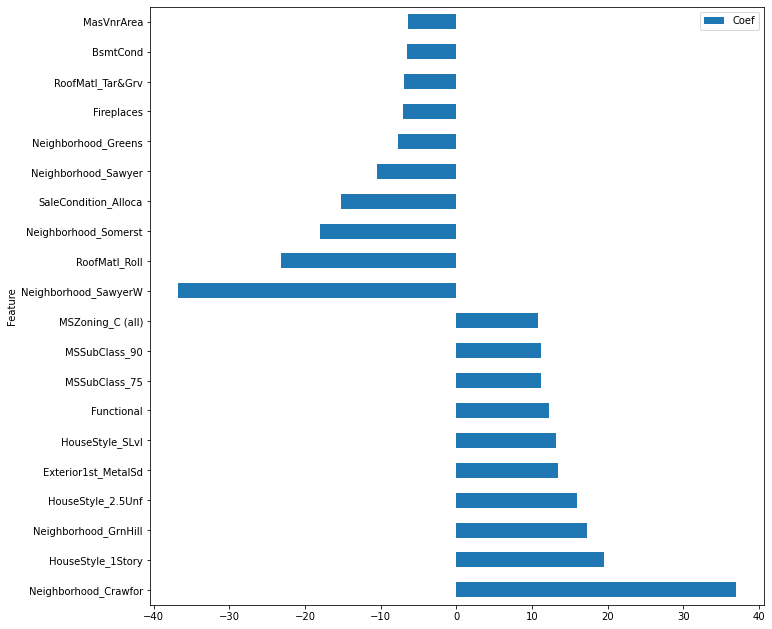

In [817]:
df3.plot(x='Feature',y='Coef',kind='barh',figsize=(11,11))

In [668]:
xx = X_scl_numers
yy = np.log(test_df['SalePrice'])

In [669]:
act = pd.DataFrame(np.exp(ridge_cv.best_estimator_.predict(xx)))
prd = pd.DataFrame(np.exp(yy))
act_prd = np.column_stack((act,prd))
act_prd = pd.DataFrame(act_prd,columns=['Prediction','Actual'])
act_prd['Off_by'] = act_prd['Actual'] - act_prd['Prediction']
act_prd['%_wrong'] = act_prd['Prediction']/act_prd['Actual']-1
act_prd.sort_values(by='Off_by',inplace=True)
act_prd.style.format({'%_wrong': '{:.2%}'})

,Prediction,Actual,Off_by,%_wrong
299,413668.302121,184750.000000,-228918.302121,123.91%
499,339848.752670,253293.000000,-86555.752670,34.17%
476,342308.671372,260000.000000,-82308.671372,31.66%
525,342880.173713,278000.000000,-64880.173713,23.34%
1511,120517.220098,62383.000000,-58134.220098,93.19%
2264,312708.956874,255000.000000,-57708.956874,22.63%
1713,236398.934413,180000.000000,-56398.934413,31.33%
417,67501.752610,12789.000000,-54712.752610,427.81%
762,387696.721171,334000.000000,-53696.721171,16.08%
975,137215.068686,84900.000000,-52315.068686,61.62%


In [670]:
overpredicted = act_prd[act_prd['Off_by']<-20000]
overpredicted

,Prediction,Actual,Off_by,%_wrong
299,413668.302121,184750.0,-228918.302121,1.239071
499,339848.752670,253293.0,-86555.752670,0.341722
476,342308.671372,260000.0,-82308.671372,0.316572
525,342880.173713,278000.0,-64880.173713,0.233382
1511,120517.220098,62383.0,-58134.220098,0.931892
...,...,...,...,...
1639,196414.767067,176000.0,-20414.767067,0.115993
1505,185810.407541,165400.0,-20410.407541,0.123400
660,123763.609442,103500.0,-20263.609442,0.195784
2452,196226.011857,176000.0,-20226.011857,0.114921


In [413]:
test_df.iloc[overpredicted.index].describe()

,Unnamed: 0,PID,GrLivArea,SalePrice,LotFrontage,LotArea,LotShape,LandSlope,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SalePricePerGLA
count,240.00000,2.400000e+02,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,1277.53750,7.041236e+08,1644.495833,166252.358333,71.104167,11544.683333,2.541667,0.070833,1968.987500,1984.433333,131.487500,3.354167,3.004167,3.462500,2.908333,1.520833,3.462500,524.295833,1.295833,61.070833,589.129167,1174.495833,4.116667,1307.858333,332.258333,4.379167,0.512500,0.083333,1.712500,0.354167,2.916667,1.037500,3.433333,6.745833,6.412500,0.833333,2.291667,1976.387500,1.766667,1.895833,514.470833,2.854167,2.833333,116.112500,54.354167,30.216667,3.820833,19.820833,5.670833,0.029167,0.529167,26.333333,6.362500,2007.925000,101.817311
std,747.42377,1.888158e+08,560.798683,71866.383835,24.789271,12054.396718,0.605357,0.287798,31.347623,20.452714,217.499098,0.544642,0.414163,0.867021,0.541126,1.001872,2.077638,499.477803,0.914769,179.966568,473.187991,499.182344,0.982554,437.993835,437.843039,38.604447,0.548724,0.291679,0.568204,0.504772,0.942562,0.190381,0.610005,1.656098,1.230985,0.712510,1.678791,24.745818,0.860411,0.755443,219.758024,0.599497,0.604493,157.011259,85.481773,72.273560,30.506279,56.544399,62.947245,0.322100,1.178247,185.848426,3.041871,1.281752,29.663748
min,47.00000,5.263021e+08,334.000000,12789.000000,24.000000,1700.000000,0.000000,0.000000,1880.000000,1950.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,1910.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,15.371394
25%,555.50000,5.283651e+08,1314.500000,123375.000000,59.500000,7200.000000,2.000000,0.000000,1949.000000,1965.000000,0.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,0.000000,1.000000,0.000000,237.000000,851.500000,3.000000,983.750000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,3.000000,6.000000,7.000000,0.000000,0.000000,1957.000000,1.000000,1.000000,400.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,79.077781
50%,1321.50000,5.353402e+08,1597.500000,161250.000000,70.000000,9900.000000,3.000000,0.000000,1974.000000,1993.000000,0.000000,3.000000,3.000000,4.000000,3.000000,1.000000,3.000000,415.500000,1.000000,0.000000,473.000000,1151.000000,4.000000,1291.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,3.000000,7.000000,7.000000,1.000000,3.000000,1980.000000,2.000000,2.000000,495.000000,3.000000,3.000000,14.000000,27.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,102.097363
75%,1965.75000,9.071251e+08,1890.500000,196400.000000,80.000000,12695.000000,3.000000,0.0

In [414]:
underpredicted = act_prd[act_prd['Off_by']>=20000]
underpredicted

,Prediction,Actual,Off_by,%_wrong
1660,209927.441816,230000.0,20072.558184,-0.087272
2544,89785.043729,109900.0,20114.956271,-0.183030
1891,243244.168243,263400.0,20155.831757,-0.076522
343,236714.936929,256900.0,20185.063071,-0.078572
2331,123800.022268,144000.0,20199.977732,-0.140278
...,...,...,...,...
63,497890.497386,615000.0,117109.502614,-0.190422
570,479624.770062,611657.0,132032.229938,-0.215860
1348,167195.867168,334000.0,166804.132832,-0.499414
1981,302377.765154,475000.0,172622.234846,-0.363415


In [415]:
test_df.iloc[underpredicted.index].describe()

,Unnamed: 0,PID,GrLivArea,SalePrice,LotFrontage,LotArea,LotShape,LandSlope,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SalePricePerGLA
count,307.000000,3.070000e+02,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.00000,307.000000,307.000000,307.00000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000
mean,1248.941368,7.295554e+08,1826.618893,271792.478827,74.498371,12514.560261,2.456026,0.091205,1976.006515,1991.234528,164.824104,3.781759,3.143322,3.859935,3.013029,2.237785,4.071661,635.377850,1.286645,55.81759,606.211726,1297.407166,4.52443,1412.781759,410.957655,2.879479,0.579805,0.045603,1.775244,0.400651,2.833876,1.042345,3.983713,6.990228,6.915309,0.918567,2.798046,1981.140065,2.026059,2.087948,567.130293,2.889251,2.859935,123.762215,63.951140,27.648208,3.609121,26.107492,4.534202,0.055375,0.504886,37.035831,6.114007,2007.846906,149.774414
std,768.329035,1.892647e+08,542.451047,104621.942565,22.011379,7488.190649,0.626632,0.299489,34.381747,19.863679,241.524262,0.723955,0.418891,0.998327,0.536108,1.337789,2.230525,572.333671,1.058386,215.65627,466.286818,502.286029,0.80555,415.079662,513.925602,35.906949,0.562426,0.208962,0.534716,0.490831,0.929769,0.201704,0.756062,1.635963,0.449393,0.633911,1.668116,28.877416,0.931987,0.821734,247.486309,0.642286,0.628769,142.823416,69.292651,87.059780,27.356225,72.323652,44.107726,0.491957,1.200140,319.007871,2.767109,1.337988,38.643384
min,2.000000,5.263530e+08,672.000000,99900.000000,25.000000,2880.000000,0.000000,0.000000,1880.000000,1950.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.00000,495.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,4.000000,3.000000,0.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,60.070316
25%,587.500000,5.283451e+08,1494.000000,200000.000000,60.000000,9000.000000,2.000000,0.000000,1950.000000,1985.500000,0.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,0.000000,1.000000,0.00000,266.500000,912.000000,4.00000,1066.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,3.000000,6.000000,7.000000,1.000000,2.000000,1960.000000,1.000000,2.000000,414.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,118.319999
50%,1212.000000,9.023271e+08,1768.000000,259500.000000,70.000000,11308.000000,3.000000,0.000000,1994.000000,2000.000000,0.000000,4.000000,3.000000,4.000000,3.000000,2.000000,6.000000,569.000000,1.000000,0.00000,528.000000,1317.000000,5.00000,1424.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,3.000000,1.000000,4.000000,7.000000,7.000000,1.000000,3.000000,1995.000000,2.000000,2.000000,556.000000,3.000000,3.000000,108.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,149.166667
75%,1952.500000,9.072522e+08,2102.500000,330450.000000,85.000000,14087.500000,3.000000,0.000

In [416]:
test_df.iloc[act_prd['%_wrong'].nlargest(150).index].describe()

,Unnamed: 0,PID,GrLivArea,SalePrice,LotFrontage,LotArea,LotShape,LandSlope,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SalePricePerGLA
count,150.000000,1.500000e+02,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,1288.193333,7.578853e+08,1377.893333,113450.813333,67.373333,9622.566667,2.746667,0.086667,1948.686667,1971.953333,73.266667,3.093333,2.946667,2.940000,2.686667,1.240000,2.533333,363.200000,1.200000,46.320000,521.286667,930.806667,3.606667,1105.466667,268.180000,4.246667,0.360000,0.073333,1.433333,0.220000,2.713333,1.073333,3.120000,6.220000,6.300000,0.473333,1.366667,1960.706667,1.213333,1.453333,406.493333,2.486667,2.453333,78.360000,41.280000,38.860000,1.120000,8.980000,9.073333,0.046667,0.613333,49.466667,6.413333,2007.953333,84.468290
std,747.430082,1.848534e+08,596.482454,52958.212641,24.741698,6296.728428,0.507483,0.305139,29.029986,21.594287,149.382787,0.453867,0.502165,0.956995,0.769700,0.840901,1.841602,458.261436,0.851371,147.445648,421.886691,503.592433,1.015958,472.653465,371.144703,31.841035,0.534451,0.286067,0.584092,0.431479,0.992162,0.286067,0.578357,1.790617,1.364704,0.662481,1.712240,24.359113,0.756064,0.863788,256.503692,1.047443,1.046481,134.725437,89.603311,69.248994,13.717143,40.495831,79.527640,0.406931,1.224946,304.599609,2.981344,1.342824,23.081551
min,37.000000,5.263021e+08,334.000000,12789.000000,21.000000,1484.000000,0.000000,0.000000,1880.000000,1950.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,15.371394
25%,545.250000,5.344591e+08,909.000000,76875.000000,52.250000,6120.000000,3.000000,0.000000,1925.000000,1950.000000,0.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,0.000000,1.000000,0.000000,197.000000,663.000000,3.000000,766.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,3.000000,5.000000,6.000000,0.000000,0.000000,1946.000000,1.000000,1.000000,258.000000,2.250000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.250000,2007.000000,67.818100
50%,1397.500000,9.023151e+08,1350.500000,102750.000000,63.000000,8798.500000,3.000000,0.000000,1949.000000,1965.500000,0.000000,3.000000,3.000000,3.000000,3.000000,1.000000,2.000000,187.000000,1.000000,0.000000,462.000000,862.500000,3.000000,1004.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,3.000000,6.000000,7.000000,0.000000,0.000000,1958.000000,1.000000,1.000000,392.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,81.974815
75%,1956.750000,9.082441e+08,1676.500000,137975.000000,71.000000,10978.750000,3.000000,0.000000,

In [417]:
test_df.iloc[list(set(test_df.index)-set(act_prd['%_wrong'].nlargest(150).index))].describe()

,Unnamed: 0,PID,GrLivArea,SalePrice,LotFrontage,LotArea,LotShape,LandSlope,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SalePricePerGLA
count,2402.000000,2.402000e+03,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000
mean,1294.912989,7.124058e+08,1492.276020,182550.907993,68.274563,10122.913822,2.589092,0.049126,1971.821399,1984.675271,100.033722,3.392590,3.103664,3.488343,2.942548,1.627810,3.678601,450.501665,1.308077,53.785179,539.038301,1043.325146,4.176936,1147.410075,340.897585,3.968360,0.442132,0.059950,1.558701,0.387177,2.855121,1.037885,3.506661,6.392590,6.883847,0.611574,1.785179,1976.963364,1.742714,1.768526,471.182348,2.838052,2.848876,97.491674,46.243131,22.133222,2.627394,16.431307,1.002498,0.009159,0.606578,43.315987,6.128226,2007.832223,123.491444
std,742.930885,1.886274e+08,479.993477,74455.978649,20.922829,8213.163622,0.574131,0.236421,29.239552,20.126451,176.316575,0.559938,0.363465,0.862996,0.537658,1.066951,2.086217,427.270751,1.000629,176.186201,424.794239,411.675616,0.939175,369.504471,426.332231,44.163443,0.517280,0.237444,0.542344,0.499865,0.807499,0.193127,0.637700,1.511966,0.528486,0.646845,1.787451,24.783152,0.885582,0.726514,203.591628,0.653699,0.647342,128.912250,62.679600,63.590859,25.987098,57.092584,21.928531,0.191226,1.241919,486.188293,2.647286,1.311752,29.424611
min,0.000000,5.263011e+08,438.000000,58500.000000,21.000000,1300.000000,0.000000,0.000000,1872.000000,1950.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,2.000000,0.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,50.937500
25%,659.250000,5.284801e+08,1120.250000,133000.000000,60.000000,7500.000000,2.000000,0.000000,1955.000000,1967.000000,0.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,0.000000,1.000000,0.000000,215.250000,798.000000,3.000000,877.250000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,3.000000,5.000000,7.000000,0.000000,0.000000,1960.000000,1.000000,1.000000,331.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,103.692486
50%,1293.500000,5.354530e+08,1440.000000,163000.000000,70.000000,9432.000000,3.000000,0.000000,1974.000000,1993.000000,0.000000,3.000000,3.000000,4.000000,3.000000,1.000000,4.000000,399.500000,1.000000,0.000000,443.000000,984.000000,5.000000,1072.500000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,3.000000,6.000000,7.000000,1.000000,2.000000,1978.000000,2.000000,2.000000,478.000000,3.000000,3.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,121.533659
75%,1935.500000,9.071751e+08,1737

In [418]:
test_df.iloc[act_prd['%_wrong'].nsmallest(150).index].describe()

,Unnamed: 0,PID,GrLivArea,SalePrice,LotFrontage,LotArea,LotShape,LandSlope,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SalePricePerGLA
count,150.000000,1.500000e+02,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,1237.566667,7.791615e+08,1649.586667,239901.600000,70.893333,11195.593333,2.566667,0.100000,1959.453333,1982.653333,105.520000,3.580000,3.186667,3.473333,2.933333,2.080000,3.193333,466.120000,1.440000,86.206667,592.186667,1144.513333,4.266667,1303.906667,341.513333,4.166667,0.460000,0.046667,1.626667,0.286667,2.693333,1.066667,3.746667,6.586667,6.893333,0.766667,2.373333,1968.340000,1.633333,1.740000,475.166667,2.746667,2.686667,102.180000,53.653333,43.106667,4.053333,25.986667,9.280000,0.113333,0.653333,5.666667,6.160000,2007.833333,144.452076
std,818.365070,1.786458e+08,598.816150,120119.238568,20.042119,5010.523838,0.584092,0.301005,37.219571,23.801750,202.301746,0.762106,0.483092,1.115460,0.701548,1.368485,2.263503,579.411538,1.382926,276.440615,449.141125,543.532366,0.945968,440.296915,472.811010,46.874732,0.574982,0.211631,0.608074,0.453719,0.919196,0.250279,0.860675,1.769187,0.465547,0.649384,1.844806,31.890086,0.985919,0.893151,270.766286,0.920947,0.905884,141.469283,74.708291,111.861380,25.867703,72.503921,62.857794,0.700304,1.336060,48.995503,2.564811,1.312903,43.170923
min,2.000000,5.271081e+08,572.000000,75000.000000,35.000000,2938.000000,1.000000,0.000000,1880.000000,1950.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,495.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,2.000000,4.000000,4.000000,0.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,60.070316
25%,544.000000,5.342022e+08,1189.000000,139425.000000,60.000000,8096.250000,2.000000,0.000000,1925.000000,1951.000000,0.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,0.000000,1.000000,0.000000,248.500000,798.000000,3.000000,971.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,3.000000,5.000000,7.000000,0.000000,0.000000,1940.250000,1.000000,1.000000,261.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,113.076830
50%,1259.500000,9.034002e+08,1626.000000,214750.000000,70.000000,10228.000000,3.000000,0.000000,1955.500000,1993.500000,0.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,239.000000,1.000000,0.000000,568.000000,1041.000000,5.000000,1194.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,4.000000,6.000000,7.000000,1.000000,3.000000,1969.000000,1.000000,2.000000,479.000000,3.000000,3.000000,29.500000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,136.150624
75%,2001.500000,9.064095e+08,1987.750000,310632.500000,81.750000,13494.500000,3.000

# Lasso

In [699]:
lasso  = Lasso()
lasso_params = {'alpha':[.01,.1,1,10,100,500,1000,10000]}
lasso_cv = GridSearchCV(lasso,lasso_params , scoring='neg_mean_squared_error',cv=90)
L = [x_scl_psf_train, x_scl_psf_test, y_scl_psf_train, y_scl_psf_test]
lasso_cv.fit(L[0],L[2])
lasso_cv.best_estimator_.fit(L[0],L[2])
print(lasso_cv.best_estimator_.score(L[0],L[2]))
print(lasso_cv.best_estimator_.score(L[1],L[3]))
## .8444
## .8702
print(1 - (1-lasso_cv.best_estimator_.score(L[0],L[2]))*(len(L[2])-1)/(len(L[2])-L[0].shape[1]-1))
print(1 - (1-lasso_cv.best_estimator_.score(L[1],L[3]))*(len(L[3])-1)/(len(L[3])-L[1].shape[1]-1))
## .8164
## .7603
lasso_coefs = list(zip(x_scl_train.columns, lasso_cv.best_estimator_.coef_))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 814.7770549692796, tolerance: 170.8579809475137
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2174.965855740302, tolerance: 170.4275161816491
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 288.1925933082239, tolerance: 170.1166629821475
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarnin

0.8581380998614242
0.8216199747021727
0.8398927345338669
0.7288112741892221


# Elastic Net

In [700]:
elasticnet = ElasticNet(tol=.5,normalize=True)
alphaRange = np.logspace(-10, 2, 100)
l1_range = np.array((.001,.01,.25,.5,.75,.99,.999,1))
elasticnet_params = {'alpha':alphaRange,'l1_ratio':l1_range}
elasticnet_cv = GridSearchCV(elasticnet,elasticnet_params,cv=20)

L = [x_scl_psf_train, x_scl_psf_test, y_scl_psf_train, y_scl_psf_test]
elasticnet_cv.fit(L[0],L[2])
elasticnet_cv.best_estimator_.fit(L[0],L[2])
print(elasticnet_cv.best_estimator_.score(L[0],L[2]))
print(elasticnet_cv.best_estimator_.score(L[1],L[3]))
## 0.8979
## 0.9095

print(1 - (1-elasticnet_cv.best_estimator_.score(L[0],L[2]))*(len(L[2])-1)/(len(L[2])-L[0].shape[1]-1))
print(1 - (1-elasticnet_cv.best_estimator_.score(L[1],L[3]))*(len(L[3])-1)/(len(L[3])-L[1].shape[1]-1))
## 0.8896
## 0.8412

0.8009974328377029
0.7792542760570587
0.7754030023708115
0.664403278874335


In [421]:
# from sklearn.svm import SVR
# from sklearn.model_selection import GridSearchCV

# L = [x_scl_train_log, x_scl_test_log, y_scl_train_log, y_scl_test_log]
# svr = SVR()
# svr_params = {'kernel': ['linear'], 'gamma': [1e-4],'C': [1]}
# # svr_params = {'kernel': ['linear'], 'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9],'C': [1, 10, 100, 1000, 10000],'epsilon': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9,1]}
# svr_cv = GridSearchCV(svr,svr_params)

In [422]:
# svr_cv.fit(L[0],L[2])

In [423]:
# svr_cv.best

# Predictions using only Numerics

In [207]:
norm_numer.drop('Unnamed: 0',axis=1,inplace=True)

In [208]:
np.random.seed(5)
from sklearn.model_selection import train_test_split
norm_numer
y_psf = test_df['SalePricePerGLA']
x_tr, x_te, y_tr, y_te = train_test_split(norm_numer,y_log_psf,test_size=.25)

In [209]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV

In [210]:
ols = LinearRegression()
ols.fit(x_tr,y_tr)
ols.score(x_tr,y_tr)
ols.score(x_te,y_te)

0.666622156186643

In [211]:
ridge = Ridge()
lasso = Lasso()
elasticnet = ElasticNet()
alp = np.array((1e-5,1e-4,1e-3,1e-2,1e-1,.2,.25,.5,.75,.9,.99,1,2,5,10,100,1000))
ridge_params={"alpha":alp}
elasticnet_params={"max_iter": [1, 5, 10],
                      "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                      "l1_ratio": np.arange(0.0, 1.0, 0.1)}
lasso_params={'alpha':alp}

In [212]:
elasticnet_cv = GridSearchCV(elasticnet,elasticnet_params,cv=10)
elasticnet_cv.fit(x_tr,y_tr)
elasticnet_cv.best_estimator_.fit(x_tr,y_tr)
print(elasticnet_cv.best_estimator_.score(x_tr,y_tr))
print(elasticnet_cv.best_estimator_.score(x_te,y_te))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.251628943837783, tolerance: 0.011145623355505141
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24.378543502583987, tolerance: 0.012044193045407221
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24.211025745317478, tolerance: 0.01191448588260895
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: Conver

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.896411235450422, tolerance: 0.011915235303223231
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.25893701458347, tolerance: 0.011145623355505141
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24.385027420439446, tolerance: 0.012044193045407221
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: Conver

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.493773711200028, tolerance: 0.011915235303223231
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.266208160400573, tolerance: 0.011145623355505141
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24.391474931416518, tolerance: 0.012044193045407221
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: Conve

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.176389969179773, tolerance: 0.012038977016162883
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.0653863527456, tolerance: 0.01199074603420679
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.099133802583893, tolerance: 0.011915235303223231
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: Converge

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24.86012195306087, tolerance: 0.012141940236783277
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24.853839000783957, tolerance: 0.012131831590032933
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25.187052243626436, tolerance: 0.012395115145052427
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: Conver

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24.50512645876871, tolerance: 0.012038977016162883
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24.58602352743917, tolerance: 0.01199074603420679
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24.43601068939451, tolerance: 0.011915235303223231
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: Convergen

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.510763950103062, tolerance: 0.01191448588260895
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.96981708667186, tolerance: 0.01218601342992717
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.801748850301355, tolerance: 0.012141940236783277
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: Converge

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.458580489177887, tolerance: 0.01191448588260895
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.52835706809653, tolerance: 0.01218601342992717
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.37897160806827, tolerance: 0.012141940236783277
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: Convergen

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.900052950578846, tolerance: 0.012044193045407221
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.553879404997621, tolerance: 0.01191448588260895
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.424554848173376, tolerance: 0.01218601342992717
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: Converg

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24.622523688054716, tolerance: 0.011915235303223231
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.448395668478675, tolerance: 0.011145623355505141
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.965359023509652, tolerance: 0.012044193045407221
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: Conve

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24.73135154353495, tolerance: 0.012038977016162883
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24.811838603058014, tolerance: 0.01199074603420679
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24.662672107919462, tolerance: 0.011915235303223231
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: Converg

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25.539685413925017, tolerance: 0.012131831590032933
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25.842229729226652, tolerance: 0.012395115145052427
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25.094963381208938, tolerance: 0.012038977016162883
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: Conve

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24.985480162745063, tolerance: 0.012044193045407221
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24.68574768635839, tolerance: 0.01191448588260895
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25.439500108691306, tolerance: 0.01218601342992717
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: Converge

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.2516871332234984, tolerance: 0.012395115145052427
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.1607714429712495, tolerance: 0.012038977016162883
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.927984023766797, tolerance: 0.01199074603420679
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: Converg

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.7631432047171494, tolerance: 0.012141940236783277
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.467077566987019, tolerance: 0.012131831590032933
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.2179106324508524, tolerance: 0.012395115145052427
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: Conver

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3003912473723283, tolerance: 0.011145623355505141
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3211462163877528, tolerance: 0.012044193045407221
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.622067746198077, tolerance: 0.01191448588260895
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: Converg

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.741348849150043, tolerance: 0.01199074603420679
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.357146215543651, tolerance: 0.011915235303223231
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7994220272741188, tolerance: 0.011145623355505141
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: Converge

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4969796239504447, tolerance: 0.01218601342992717
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5499844783020791, tolerance: 0.012141940236783277
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4295441009665808, tolerance: 0.012131831590032933
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: Conver

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.986877477393271, tolerance: 0.011915235303223231
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.22209017101948803, tolerance: 0.011145623355505141
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.13129635185907773, tolerance: 0.012044193045407221
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: Conv

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.0980636899650023, tolerance: 0.012038977016162883
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.346545178256676, tolerance: 0.01199074603420679
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.833518892139196, tolerance: 0.011915235303223231
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: Converge

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.49876961131207054, tolerance: 0.01199074603420679
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2708463628292037, tolerance: 0.011915235303223231
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31.550384343383108, tolerance: 0.011145623355505141
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: Conve

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46.55736344643577, tolerance: 0.011145623355505141
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50.53680610976959, tolerance: 0.012044193045407221
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49.931422747877896, tolerance: 0.01191448588260895
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: Converge

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 54.47783472926908, tolerance: 0.011145623355505141
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 58.904178122641035, tolerance: 0.012044193045407221
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 58.259751349689644, tolerance: 0.01191448588260895
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: Converg

0.6872019826375262
0.6719080290998105


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.19633422234516, tolerance: 0.013323612624922763
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.19633422234516, tolerance: 0.013323612624922763
  model = cd_fast.enet_coordinate_descent(


In [213]:
lasso_cv = GridSearchCV(lasso,lasso_params,cv=10)
lasso_cv.fit(x_tr,y_tr)
lasso_cv.best_estimator_.fit(x_tr,y_tr)
print(lasso_cv.best_estimator_.score(x_tr,y_tr))
print(lasso_cv.best_estimator_.score(x_te,y_te))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2298746574368025, tolerance: 0.011145623355505141
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4261976445950282, tolerance: 0.012044193045407221
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.397667144871221, tolerance: 0.01191448588260895
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: Converg

0.6871912719046247
0.6718152897537792


In [223]:
ridge_cv = GridSearchCV(ridge,ridge_params,cv=10)
ridge_cv.fit(x_tr,y_tr)
ridge_cv.best_estimator_.fit(x_tr,y_tr)
print(ridge_cv.best_estimator_.score(x_tr,y_tr))
print(ridge_cv.best_estimator_.score(x_te,y_te))

0.6880049464850788
0.668331684824787


# Normalized effect of Numerical Inputs on Sales Price per Sqaure foot

In [424]:
ridge_cv.best_estimator_.fit(norm_numer,y_psf)
ridge_cv.best_estimator_.predict(norm_numer)
sorted(list(zip(ridge_cv.best_estimator_.coef_,norm_numer.columns)),key=lambda x: x[0])
effect_df = pd.DataFrame(sorted(list(zip(norm_numer.columns,ridge_cv.best_estimator_.coef_)),key=lambda x: x[0]),columns=['NumericFeat','Effect'])

In [425]:
effect_df.sort_values(by='Effect')

,NumericFeat,Effect
15,GrLivArea,-5.916361
3,BedroomAbvGr,-4.405401
1,2ndFlrSF,-4.202315
0,1stFlrSF,-2.829797
17,KitchenAbvGr,-2.600725
16,HalfBath,-2.012222
11,FullBath,-1.323607
20,LowQualFinSF,-0.997861
25,PoolArea,-0.489890
29,Unnamed: 0,-0.480527


In [426]:
effect_df.sort_values(by='Effect',inplace=True)

In [427]:
effect_df

,NumericFeat,Effect
15,GrLivArea,-5.916361
3,BedroomAbvGr,-4.405401
1,2ndFlrSF,-4.202315
0,1stFlrSF,-2.829797
17,KitchenAbvGr,-2.600725
16,HalfBath,-2.012222
11,FullBath,-1.323607
20,LowQualFinSF,-0.997861
25,PoolArea,-0.489890
29,Unnamed: 0,-0.480527


<BarContainer object of 34 artists>

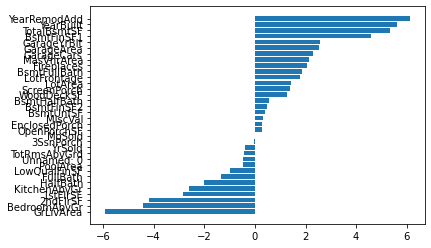

In [428]:
# effect_df.plot(x=effect_df['Effect'],y=effect_df['Effect'],kind='barh')
x=effect_df['Effect']
y=effect_df['NumericFeat']
plt.barh(y,x)

In [429]:
##Scaled Numbers, Full Sale $
import random
random.seed(5)
L = [x_scl_train_log, x_scl_test_log, y_scl_train_log, y_scl_test_log]
ridge_cv.fit(L[0],L[2])
ridge_cv.best_estimator_.fit(L[0],L[2])
print(ridge_cv.best_estimator_.score(L[0],L[2]))
print(ridge_cv.best_estimator_.score(L[1],L[3]))
## 0.9407474470450479
## 0.9440270090467103
print(1 - (1-ridge_cv.best_estimator_.score(L[0],L[2]))*(len(L[2])-1)/(len(L[2])-L[0].shape[1]-1))
print(1 - (1-ridge_cv.best_estimator_.score(L[1],L[3]))*(len(L[3])-1)/(len(L[3])-L[1].shape[1]-1))
## 0.930073945834162
## 0.8966527674282738

0.910392272966795
0.8935558357715658
0.90004689107025
0.8455468505386958


In [430]:
x_full = pd.concat((x_scl_train_log, x_scl_test_log),axis=0)
y_full = pd.concat((y_scl_train_log, y_scl_test_log),axis=0)
np.exp(ridge_cv.best_estimator_.predict(x_full)) - np.exp(y_full)

899     -9694.290645
2257    86549.583762
2172    -7454.737656
111     23471.471270
596       242.603549
            ...     
2149    -4001.629073
109      2508.132964
2066    10343.628833
370      1099.996532
1710    29171.897198
Name: SalePrice, Length: 2552, dtype: float64

In [431]:
import sklearn.ensemble
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()

In [432]:
gbr_params = {'n_estimators':[1000,2500],'learning_rate' :[.05,.1,.2],'max_depth':[4,5,6,7,8]}

In [433]:
L = [x_scl_train_log, x_scl_test_log, y_scl_train_log, y_scl_test_log]

In [434]:
L = [x_scl_train_log, x_scl_test_log, y_scl_train_log, y_scl_test_log]

In [435]:
gbr_cv = GridSearchCV(gbr,gbr_params)
gbr_cv.fit(x_scl_train_log,y_scl_train_log)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [4, 5, 6, 7, 8],
                         'n_estimators': [1000, 2500]})

In [436]:
gbr_cv.best_estimator_.fit(x_scl_train_log,y_scl_train_log)
gbr_cv.best_estimator_.score(x_scl_train_log,y_scl_train_log)

0.9932030871439252

In [437]:
gbr_cv.best_estimator_.score(x_scl_test_log,y_scl_test_log)

0.8845993370963058

In [589]:
to_pred = pd.concat((x_scl_train_log,x_scl_test_log),axis=0)
to_pred.index
targs = pd.concat((y_scl_train_log,y_scl_test_log),axis=0)
to_pred
gbr_cv.best_estimator_.predict(to_pred)

array([135.99989846,  68.18180114, 181.48448909, ..., 136.19715854,
       100.80847116,  79.67160117])

,Index,Pred
0,899,1.158792e+59
1,2257,4.083006e+29
2,2172,6.572221e+78
3,111,1.172561e+40
4,596,1.677710e+69
...,...,...
2547,2149,1.629650e+47
2548,109,1.222385e+39
2549,2066,1.411479e+59
2550,370,6.033409e+43


In [438]:
feat_imps = sorted(list(zip(gbr_cv.best_estimator_.feature_importances_,x_scl_train_log)))#, lambda x: x[0])

In [439]:
feat_imps

[(0.0, 'Condition2_PosA'),
 (0.0, 'Condition2_RRAe'),
 (0.0, 'Condition2_RRAn'),
 (0.0, 'Condition2_RRNn'),
 (0.0, 'Exterior1st_ImStucc'),
 (0.0, 'Exterior2nd_CBlock'),
 (0.0, 'HouseStyle_2.5Fin'),
 (0.0, 'MSSubClass_150'),
 (0.0, 'MSZoning_I (all)'),
 (0.0, 'RoofMatl_Membran'),
 (0.0, 'RoofMatl_Metal'),
 (0.0, 'RoofMatl_Roll'),
 (0.0, 'SaleCondition_Alloca'),
 (6.492534352433651e-11, 'MSSubClass_180'),
 (4.0989979190908284e-08, 'Neighborhood_BrDale'),
 (4.7130559787984754e-08, 'RoofMatl_WdShake'),
 (1.6474857025077222e-07, 'Condition2_Feedr'),
 (2.39053857035944e-07, 'SaleType_VWD'),
 (2.505961865432984e-07, 'Heating_Wall'),
 (3.192567015468951e-07, 'RoofStyle_Mansard'),
 (9.032607922458358e-07, 'SaleType_Con'),
 (1.086964083857379e-06, 'BldgType_Twnhs'),
 (1.235787613618664e-06, 'Condition1_RRNe'),
 (1.7084861243454263e-06, 'RoofMatl_Tar&Grv'),
 (1.8492819801964541e-06, 'RoofStyle_Shed'),
 (2.6275227249590913e-06, 'SaleType_ConLw'),
 (2.86159175687234e-06, 'Neighborhood_Landmrk'),
 (

In [440]:
x_scl_psf_train, x_scl_psf_test, y_scl_psf_train, y_scl_psf_test

(            PID  SaleCondition_Alloca  SaleCondition_Normal  \
 364   903225160                     0                     1   
 979   909425140                     0                     1   
 1647  908152060                     0                     1   
 1419  535451110                     0                     1   
 2113  903228090                     0                     1   
 ...         ...                   ...                   ...   
 1411  902103100                     0                     1   
 53    532479020                     0                     1   
 2365  528240050                     0                     1   
 49    533206070                     0                     0   
 2388  902327040                     0                     1   
 
       SaleCondition_Partial  Condition1_Feedr  Condition1_Norm  \
 364                       0                 1                0   
 979                       0                 0                1   
 1647                      0 

In [441]:
gbr_cv = GridSearchCV(gbr,gbr_params)
gbr_cv.fit(x_scl_psf_train,y_scl_psf_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [4, 5, 6, 7, 8],
                         'n_estimators': [1000, 2500]})

In [442]:
gbr_cv.best_estimator_.score(x_scl_psf_train,y_scl_psf_train)

0.9999999999806419

In [443]:
gbr_cv.best_estimator_.score(x_scl_psf_test,y_scl_psf_test)

0.8045683035284454

In [836]:
feat_imps_psf = sorted(list(zip(gbr_cv.best_estimator_.feature_importances_,x_scl_psf_test.columns)))

In [837]:
feat_imps_psf

[(0.0, 'Condition2_RRAe'),
 (0.0, 'Condition2_RRAn'),
 (0.0, 'Exterior1st_PreCast'),
 (0.0, 'Exterior2nd_PreCast'),
 (0.0, 'MSSubClass_40'),
 (0.0, 'SaleType_VWD'),
 (6.5934591693788e-14, 'Exterior2nd_AsphShn'),
 (1.2594738102247417e-13, 'Exterior1st_ImStucc'),
 (2.6281970879596206e-11, 'SaleType_ConLw'),
 (4.90645501338845e-11, 'HouseStyle_2.5Fin'),
 (1.9925877795131216e-09, 'Condition2_RRNn'),
 (2.3483062283828355e-09, 'RoofStyle_Shed'),
 (9.108439990282334e-09, 'RoofMatl_Metal'),
 (1.0848360590131005e-08, 'RoofMatl_WdShake'),
 (1.5101966421789646e-08, 'MSZoning_I (all)'),
 (1.6817385636756295e-08, 'RoofMatl_Roll'),
 (1.8179713648759868e-08, 'MSSubClass_150'),
 (3.698882716251231e-08, 'Exterior1st_AsphShn'),
 (5.541780361624175e-08, 'Exterior2nd_CBlock'),
 (7.730168425936729e-08, 'RoofStyle_Mansard'),
 (2.169446087386152e-07, 'RoofMatl_Tar&Grv'),
 (2.484655329310414e-07, 'MSSubClass_180'),
 (3.0531830530303263e-07, 'Condition1_RRNe'),
 (5.85224985188142e-07, 'Electrical_FuseP'),
 (1.

# Top 20 / Bottom 80

In [739]:
X['GrLivArea']

top_twenty = list(X.nlargest((int(len(X)*.2)),'GrLivArea').index)
bottom_eighty = list(X.nsmallest((int(len(X)*.8)),'GrLivArea').index)
X.iloc[bottom_eighty]

pred_df = pd.DataFrame(np.exp(np.array(ttl_preds)),columns=['ignore','Prediction']).drop('ignore',axis=1)

X.merge(pred_df,left_index=True,right_index=True)
test_df
ttl_preds

<ipython-input-739-010af4177313>:7: RuntimeWarning: overflow encountered in exp
  pred_df = pd.DataFrame(np.exp(np.array(ttl_preds)),columns=['ignore','Prediction']).drop('ignore',axis=1)


[(945, 102.47083440587689),
 (1113, 91.4325431470846),
 (1659, 150.00172938066015),
 (1266, 148.20178157799444),
 (833, 96.50051998090069),
 (2319, 100.79948951466226),
 (2404, 131.64654782796157),
 (2282, 124.95629523704976),
 (726, 128.98418034826375),
 (2265, 96.43918226891617),
 (117, 150.69078135864544),
 (1258, 148.72186567924342),
 (825, 112.86125197753434),
 (2256, 81.85813389251715),
 (1170, 128.83749142404048),
 (1270, 132.85250900487625),
 (103, 123.0111339445405),
 (2512, 71.59446958436598),
 (1780, 142.055025390318),
 (1795, 127.6052519474858),
 (1140, 77.60235107223536),
 (1142, 137.41140991377506),
 (746, 149.26913135960814),
 (1641, 128.8222636793853),
 (1903, 175.94172499376248),
 (2539, 116.86055476599672),
 (1103, 148.89250693446667),
 (601, 135.3427026989413),
 (1516, 81.36502086817488),
 (2106, 109.31196570390755),
 (1239, 141.91619597282636),
 (2138, 152.83272191126093),
 (2513, 90.69680471516259),
 (286, 166.10870123152125),
 (1029, 96.0655857770082),
 (450, 137.

In [740]:
with_preds = test_df.iloc[bottom_eighty].merge(pred_df,right_index=True,left_index=True)
with_preds['OffBy'] = with_preds['SalePrice'] - with_preds['Prediction']

In [741]:
bottom_80_all_else.describe()

,Unnamed: 0,PID,GrLivArea,SalePrice,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePricePerGLA,Prediction,OffBy
count,1118.000000,1.118000e+03,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000
mean,1311.532200,7.035366e+08,1382.769231,177761.312165,67.427996,9872.616279,1976.453488,1986.837209,86.460644,475.192308,57.754919,548.054562,1081.001789,1155.545617,225.438283,1.785331,0.475850,0.070662,1.544723,0.323792,2.703936,1.017889,6.065295,0.580501,1980.512522,1.816637,478.206619,102.977639,43.507156,18.610018,4.156530,16.217352,1.094812,45.487478,6.142218,2007.867621,129.419244,138442.856803,39318.455361
std,743.506617,1.880797e+08,275.743709,51297.514185,20.286300,7452.111493,26.830431,19.438547,140.050112,416.930713,183.951370,437.162141,362.837240,325.075397,334.961061,25.581692,0.515514,0.256374,0.507124,0.477598,0.679013,0.132608,1.078907,0.623513,22.941692,0.617131,172.158864,127.791265,56.294480,56.538940,32.626993,56.414886,25.918057,448.526045,2.742025,1.303672,27.811272,36477.498590,47420.007969
min,0.000000,5.263011e+08,640.000000,64000.000000,21.000000,1488.000000,1882.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,483.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1906.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,62.843407,35530.099783,-19970.296740
25%,683.250000,5.284900e+08,1176.000000,140000.000000,60.000000,7443.000000,1959.000000,1970.000000,0.000000,0.000000,0.000000,208.000000,832.000000,879.250000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1963.000000,1.000000,388.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,111.370305,116279.104900,1409.615129
50%,1297.500000,5.353786e+08,1426.000000,170000.000000,70.000000,9237.500000,1978.000000,1996.000000,0.000000,450.000000,0.000000,438.500000,1034.000000,1113.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1983.000000,2.000000,480.000000,65.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,127.623358,135108.043111,28696.157146
75%,1961.750000,9.071790e+08,1620.000000,202623.750000,76.000000,11239.500000,2002.000000,2004.000000,147.750000,767.000000,0.000000,796.250000,1362.000000,1435.250000,585.250000,0.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,570.750000,176.000000,65.750000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,146.298938,154897.057886,64777.550768
max,2573.000000,9.241520e+08,1829.000000,392500.000000,160.000000,164660.000000,2010.000000,2010.000000,1159.000000,1619.000000,1164.000000,1824.000000,3206.000000,1828.000000,1072.000000,512.000000,2.000000,1.000000,3.000000,2.000000,6.000000,2.000000,10.000000,3.000000,2009.000000,5.000000,1356.000000,1424.000000,382.000000,584.000000,508.000000,490.000000,648.000000,12500.000000,12.000000,2010.000000,276.250881,322450.744597,249896.948229


# Mean / STDev by Nbhd

In [772]:
avg_nh = pd.DataFrame(bottom80.groupby('Neighborhood')[['SalePricePerGLA','SalePrice']].agg(['mean',np.std]))
avg_nh.columns=['Avg_by_NH', 'SD_by_NH','MeanTtl','STDevTtl']
avg_nh = avg_nh.reset_index()
avg_nh


pred_df = pd.DataFrame(ttl_preds,columns=['Index','Prediction'])
bottom80 = test_df.iloc[bottom_eighty]
underval_start = pd.merge(bottom80,avg_nh,left_on='Neighborhood',right_on='Neighborhood')
actuals_preds = pd.merge(underval_start,pred_df,left_on='Unnamed: 0',right_on='Index')
actuals_preds

pop_mean = np.mean(bottom80['SalePricePerGLA'])
pop_stdev = np.std(bottom80['SalePricePerGLA'])

In [757]:
underval_start

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePricePerGLA,Avg_by_NH,SD_by_NH,MeanTtl,STDevTtl
0,917,534450090,334,39300,20,RL,50.0,5000,Pave,NoneListed,3,Low,Inside,1,BrkSide,Norm,Norm,1Fam,1Story,1,3,1946,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,2,2,Slab,0,0,0,0,0.0,0,0.0,0.0,0.0,GasA,2,N,FuseF,334,0,0,0.0,0.0,1,0,1,1,2,2,7,0,0,NoneListed,1946.0,0,0.0,0.0,0,0,N,0,0,0,0,0,0,0,0,NoneListed,0,1,2007,WD,Normal,117.664671,104.966414,19.019345,123379.736842,33067.115280
1,689,903235100,520,68500,30,RM,60.0,6324,Pave,NoneListed,2,Lvl,Inside,0,BrkSide,Feedr,RRNn,1Fam,1Story,4,6,1927,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,BrkTil,3,3,1,1,0.0,1,0.0,520.0,520.0,GasA,2,N,SBrkr,520,0,0,0.0,0.0,1,0,1,1,2,4,7,0,0,Detchd,1920.0,1,1.0,240.0,2,3,Y,49,0,87,0,0,0,0,0,NoneListed,0,5,2008,WD,Normal,131.730769,104.966414,19.019345,123379.736842,33067.115280
2,501,903235020,616,89000,30,RM,50.0,6000,Pave,NoneListed,3,Lvl,Inside,0,BrkSide,Norm,Norm,1Fam,1Story,5,7,1921,1950,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,CBlock,3,3,1,2,616.0,1,0.0,0.0,616.0,GasA,4,Y,SBrkr,616,0,0,0.0,0.0,1,0,2,1,3,4,7,0,0,Detchd,1921.0,1,1.0,205.0,3,3,Y,0,0,129,0,0,0,0,0,NoneListed,0,6,2006,WD,Normal,144.480519,104.966414,19.019345,123379.736842,33067.115280
3,2481,534450110,666,64500,20,RL,50.0,5000,Pave,NoneListed,3,Lvl,Inside,0,BrkSide,Norm,Norm,1Fam,1Story,3,3,1946,1950,Gable,CompShg,WdShing,Wd Shng,None,0.0,2,2,CBlock,2,2,1,2,299.0,1,0.0,367.0,666.0,GasA,2,N,SBrkr,666,0,0,0.0,1.0,1,0,2,1,4,4,7,0,0,NoneListed,1946.0,0,0.0,0.0,0,0,N,0,52,0,0,0,0,0,3,NoneListed,0,4,2007,WD,Normal,96.846847,104.966414,19.019345,123379.736842,33067.115280
4,227,534451020,670,64000,50,RL,51.0,3500,Pave,NoneListed,3,Lvl,Inside,0,BrkSide,Feedr,Norm,1Fam,1.5Fin,3,5,1945,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,3,3,1,2,144.0,1,0.0,226.0,370.0,GasA,3,N,FuseA,442,228,0,1.0,0.0,1,0,2,1,2,4,7,0,0,NoneListed,1945.0,0,0.0,0.0,0,0,N,0,21,0,0,0,0,0,3,Shed,2000,7,2007,WD,Normal,95.522388,104.966414,19.019345,123379.736842,33067.115280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2036,1396,528138020,1822,259000,20,RL,79.0,14122,Pave,NoneListed,2,Lvl,Inside,0,NridgHt,Norm,Norm,1Fam,1Story,8,5,2005,2006,Hip,CompShg,CemntBd,CmentBd,BrkFace,240.0,4,3,PConc,5,3,1,6,28.0,1,0.0,1794.0,1822.0,GasA,5,Y,SBrkr,1822,0,0,0.0,0.0,2,0,3,1,5,8,7,1,4,Attchd,2005.0,2,3.0,678.0,3,3,Y,0,119,0,0,0,0,0,0,NoneListed,0,2,2010,WD,Normal,142.151482,160.563410,26.889343,250898.412698,58590.038579
2037,1204,907230240,1320,137000,160,RH,24.0,3612,Pave,NoneListed,2,Lvl,Inside,0,Landmrk,Norm,Norm,Twnhs,2Story,6,5,1993,1994,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,4,3,1,6,338.0,1,0.0,292.0,630.0,GasA,5,Y,SBrkr,630,690,0,0.0,0.0,2,1,3,1,3,5,7,0,0,Detchd,1993.0,1,2.0,484.0,3,3,Y,0,48,0,0,0,0,0,3,NoneListed,0,6,2006,WD,Normal,103.787879,103.787879,NaN,137000.000000,NaN
2038,152,533128090,1624,262000,20,RL,89

In [758]:
underval_start['SDs_away'] = (underval_start['SalePricePerGLA'] - underval_start['Avg_by_NH']) / underval_start['SD_by_NH']
undervalued = underval_start[underval_start['SDs_away']<-1]
overval = underval_start[underval_start['SDs_away']>1]

undervalued.describe()

,Unnamed: 0,PID,GrLivArea,SalePrice,LotFrontage,LotArea,LotShape,LandSlope,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SalePricePerGLA,Avg_by_NH,SD_by_NH,MeanTtl,STDevTtl,SDs_away
count,308.000000,3.080000e+02,308.000000,308.000000,308.000000,308.000000,308.00000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,1314.814935,7.289223e+08,1467.487013,131764.522727,63.311688,8912.675325,2.74026,0.042208,1961.688312,1975.071429,68.902597,3.172078,3.016234,3.051948,2.675325,1.191558,2.441558,224.204545,1.123377,32.772727,594.383117,851.360390,3.775974,1044.366883,416.100649,7.019481,0.201299,0.045455,1.551948,0.438312,3.009740,1.155844,3.201299,6.558442,6.590909,0.357143,1.071429,1967.756494,1.305195,1.454545,381.220779,2.529221,2.532468,57.405844,31.688312,27.847403,1.038961,8.902597,1.194805,0.009740,0.529221,20.535714,6.201299,2007.879870,88.931514,121.498685,22.183420,154951.601844,32319.065581,-1.466403
std,741.526589,1.879872e+08,288.210230,41216.807970,20.224560,5040.099256,0.44656,0.231489,29.911600,20.868943,142.709485,0.477097,0.422952,1.066470,0.872177,0.769318,1.999958,316.753823,0.776931,118.709814,449.828519,405.492506,1.007371,332.808381,354.938018,52.852628,0.409653,0.208638,0.504600,0.534869,0.878574,0.363298,0.539995,1.296384,1.049980,0.537561,1.571767,25.425803,0.821756,0.757941,202.718069,1.012523,1.018838,95.137211,56.544182,64.327841,18.233692,40.213238,20.968746,0.170941,1.159491,116.560879,2.788716,1.348851,19.285695,17.103539,3.959418,36056.572371,10931.347109,0.432433
min,15.000000,5.263021e+08,498.000000,12789.000000,21.000000,1476.000000,1.00000,0.000000,1875.000000,1950.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,483.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,3.000000,2.000000,0.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,15.371394,94.768499,9.092847,95183.030303,9558.769290,-3.870698
25%,692.250000,5.341284e+08,1310.500000,101350.000000,53.000000,6872.750000,2.00000,0.000000,1941.000000,1952.500000,0.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,0.000000,1.000000,0.000000,241.000000,689.000000,3.000000,807.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,3.000000,6.000000,7.000000,0.000000,0.000000,1950.000000,1.000000,1.000000,266.250000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,74.979968,105.425513,19.370182,125853.450331,23826.673750,-1.668105
50%,1308.500000,9.021296e+08,1557.000000,133250.000000,65.000000,8920.500000,3.00000,0.000000,1963.000000,1972.000000,0.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,0.000000,1.000000,0.000000,570.500000,824.500000,4.000000,945.500000,541.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.0

In [759]:
overval.describe()

,Unnamed: 0,PID,GrLivArea,SalePrice,LotFrontage,LotArea,LotShape,LandSlope,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SalePricePerGLA,Avg_by_NH,SD_by_NH,MeanTtl,STDevTtl,SDs_away
count,317.000000,3.170000e+02,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.0,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.0,317.0,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000
mean,1304.905363,7.324110e+08,1103.031546,177264.495268,64.078864,9098.722397,2.596215,0.066246,1973.375394,1987.798107,80.526814,3.400631,3.164038,3.630915,3.028391,2.119874,4.580442,629.246057,1.473186,61.671924,357.271293,1048.189274,4.223975,1083.211356,19.820189,0.0,0.681388,0.088328,1.312303,0.100946,2.217666,1.006309,3.536278,5.135647,6.977918,0.473186,1.381703,1977.897476,1.690852,1.747634,470.716088,2.870662,2.880126,102.015773,37.384858,12.630915,4.457413,19.914826,0.0,0.0,0.668770,94.006309,5.990536,2008.006309,157.087690,121.794292,22.432003,156525.290737,33067.029594,1.579613
std,757.721349,1.886729e+08,322.174709,72265.560392,18.807278,5283.870523,0.552083,0.273334,26.486821,19.834527,138.546010,0.590322,0.395665,0.724388,0.268284,1.249614,1.795915,420.081626,1.215697,183.539271,333.299883,342.100588,0.922808,327.787804,105.184990,0.0,0.518091,0.284220,0.484187,0.301734,0.688929,0.112331,0.704490,1.072037,0.244208,0.613720,1.750962,24.415374,0.881784,0.719992,200.093969,0.630695,0.640028,114.308639,60.195963,38.600839,30.788410,64.023401,0.0,0.0,1.285534,924.548491,2.611423,1.314461,22.782363,17.857152,4.023518,38157.123769,11561.133735,0.536389
min,0.000000,5.263020e+08,438.000000,60000.000000,21.000000,1477.000000,1.000000,0.000000,1900.000000,1950.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,290.000000,2.000000,438.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,4.000000,0.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,2006.000000,107.396150,94.768499,9.092847,95183.030303,9558.769290,1.002723
25%,636.000000,5.323782e+08,864.000000,129900.000000,51.000000,6762.000000,2.000000,0.000000,1957.000000,1972.000000,0.000000,3.000000,3.000000,3.000000,3.000000,1.000000,4.000000,292.000000,1.000000,0.000000,115.000000,833.000000,3.000000,854.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,3.000000,4.000000,7.000000,0.000000,0.000000,1963.000000,1.000000,1.000000,319.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,4.000000,2007.000000,142.241379,105.425513,19.370182,125853.450331,23826.673750,1.202020
50%,1350.000000,9.022051e+08,1020.000000,149000.000000,65.000000,8520.000000,3.000000,0.000000,1972.000000,1997.000000,0.000000,3.000000,3.000000,4.000000,3.000000,1.000000,5.000000,660.000000,1.000000,0.000000,252.000000,949.000000,5.000000,992.000000,0.000000,0.0,1.000000,0.000000,1.000000,0.000000,2.000000,1.000000,3.000000,5.000000,7.000000,0.000000,0.000000,1978.000000,1.000000

In [760]:
actuals_preds

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePricePerGLA,Avg_by_NH,SD_by_NH,MeanTtl,STDevTtl,Index,Prediction
0,917,534450090,334,39300,20,RL,50.0,5000,Pave,NoneListed,3,Low,Inside,1,BrkSide,Norm,Norm,1Fam,1Story,1,3,1946,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,2,2,Slab,0,0,0,0,0.0,0,0.0,0.0,0.0,GasA,2,N,FuseF,334,0,0,0.0,0.0,1,0,1,1,2,2,7,0,0,NoneListed,1946.0,0,0.0,0.0,0,0,N,0,0,0,0,0,0,0,0,NoneListed,0,1,2007,WD,Normal,117.664671,104.966414,19.019345,123379.736842,33067.115280,917,146.910515
1,689,903235100,520,68500,30,RM,60.0,6324,Pave,NoneListed,2,Lvl,Inside,0,BrkSide,Feedr,RRNn,1Fam,1Story,4,6,1927,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,BrkTil,3,3,1,1,0.0,1,0.0,520.0,520.0,GasA,2,N,SBrkr,520,0,0,0.0,0.0,1,0,1,1,2,4,7,0,0,Detchd,1920.0,1,1.0,240.0,2,3,Y,49,0,87,0,0,0,0,0,NoneListed,0,5,2008,WD,Normal,131.730769,104.966414,19.019345,123379.736842,33067.115280,689,157.997691
2,501,903235020,616,89000,30,RM,50.0,6000,Pave,NoneListed,3,Lvl,Inside,0,BrkSide,Norm,Norm,1Fam,1Story,5,7,1921,1950,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,CBlock,3,3,1,2,616.0,1,0.0,0.0,616.0,GasA,4,Y,SBrkr,616,0,0,0.0,0.0,1,0,2,1,3,4,7,0,0,Detchd,1921.0,1,1.0,205.0,3,3,Y,0,0,129,0,0,0,0,0,NoneListed,0,6,2006,WD,Normal,144.480519,104.966414,19.019345,123379.736842,33067.115280,501,50.937229
3,2481,534450110,666,64500,20,RL,50.0,5000,Pave,NoneListed,3,Lvl,Inside,0,BrkSide,Norm,Norm,1Fam,1Story,3,3,1946,1950,Gable,CompShg,WdShing,Wd Shng,None,0.0,2,2,CBlock,2,2,1,2,299.0,1,0.0,367.0,666.0,GasA,2,N,SBrkr,666,0,0,0.0,1.0,1,0,2,1,4,4,7,0,0,NoneListed,1946.0,0,0.0,0.0,0,0,N,0,52,0,0,0,0,0,3,NoneListed,0,4,2007,WD,Normal,96.846847,104.966414,19.019345,123379.736842,33067.115280,2481,125.945412
4,227,534451020,670,64000,50,RL,51.0,3500,Pave,NoneListed,3,Lvl,Inside,0,BrkSide,Feedr,Norm,1Fam,1.5Fin,3,5,1945,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,3,3,1,2,144.0,1,0.0,226.0,370.0,GasA,3,N,FuseA,442,228,0,1.0,0.0,1,0,2,1,2,4,7,0,0,NoneListed,1945.0,0,0.0,0.0,0,0,N,0,21,0,0,0,0,0,3,Shed,2000,7,2007,WD,Normal,95.522388,104.966414,19.019345,123379.736842,33067.115280,227,142.726572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,1396,528138020,1822,259000,20,RL,79.0,14122,Pave,NoneListed,2,Lvl,Inside,0,NridgHt,Norm,Norm,1Fam,1Story,8,5,2005,2006,Hip,CompShg,CemntBd,CmentBd,BrkFace,240.0,4,3,PConc,5,3,1,6,28.0,1,0.0,1794.0,1822.0,GasA,5,Y,SBrkr,1822,0,0,0.0,0.0,2,0,3,1,5,8,7,1,4,Attchd,2005.0,2,3.0,678.0,3,3,Y,0,119,0,0,0,0,0,0,NoneListed,0,2,2010,WD,Normal,142.151482,160.563410,26.889343,250898.412698,58590.038579,1396,112.911418
2015,1204,907230240,1320,137000,160,RH,24.0,3612,Pave,NoneListed,2,Lvl,Inside,0,Landmrk,Norm,Norm,Twnhs,2Story,6,5,1993,1994,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,4,3,1,6,338.0,1,0.0,292.0,630.0,GasA,5,Y,SBrkr,630,690,0,0.0,0.0,2,1,3,1,3,5,7,0,0,Detchd,1993.0,1,2.0,484.0,3,3,Y,0,48,0,0,0,0,0

In [761]:
changeable = ['Condition1', 'Condition2','OverallQual', 'OverallCond','YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd','MasVnrType', 'ExterQual', 'ExterCond','BsmtQual', 'BsmtCond', 'BsmtFinType1','BsmtFinType2', 'Heating','HeatingQC', 'CentralAir','BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath','KitchenQual','FireplaceQu','GarageFinish', 'GarageQual', 'GarageCond','PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch','ScreenPorch', 'SaleType',]

In [762]:
pd.DataFrame(srt_lst_ridge,columns=['Coef','Feat'])
chg_df = pd.DataFrame(changeable,columns=['Changeable'])
chg_df['Yes']='Yes'
chg_df

,Changeable,Yes
0,Condition1,Yes
1,Condition2,Yes
2,OverallQual,Yes
3,OverallCond,Yes
4,YearRemodAdd,Yes
5,RoofStyle,Yes
6,RoofMatl,Yes
7,Exterior1st,Yes
8,Exterior2nd,Yes
9,MasVnrType,Yes


In [763]:
## Get an undervalued list of homes based on the model i have
## Have Feature importances / coefs per model 
## get most important changeable features for investment

In [764]:
actuals_preds

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePricePerGLA,Avg_by_NH,SD_by_NH,MeanTtl,STDevTtl,Index,Prediction
0,917,534450090,334,39300,20,RL,50.0,5000,Pave,NoneListed,3,Low,Inside,1,BrkSide,Norm,Norm,1Fam,1Story,1,3,1946,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,2,2,Slab,0,0,0,0,0.0,0,0.0,0.0,0.0,GasA,2,N,FuseF,334,0,0,0.0,0.0,1,0,1,1,2,2,7,0,0,NoneListed,1946.0,0,0.0,0.0,0,0,N,0,0,0,0,0,0,0,0,NoneListed,0,1,2007,WD,Normal,117.664671,104.966414,19.019345,123379.736842,33067.115280,917,146.910515
1,689,903235100,520,68500,30,RM,60.0,6324,Pave,NoneListed,2,Lvl,Inside,0,BrkSide,Feedr,RRNn,1Fam,1Story,4,6,1927,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,BrkTil,3,3,1,1,0.0,1,0.0,520.0,520.0,GasA,2,N,SBrkr,520,0,0,0.0,0.0,1,0,1,1,2,4,7,0,0,Detchd,1920.0,1,1.0,240.0,2,3,Y,49,0,87,0,0,0,0,0,NoneListed,0,5,2008,WD,Normal,131.730769,104.966414,19.019345,123379.736842,33067.115280,689,157.997691
2,501,903235020,616,89000,30,RM,50.0,6000,Pave,NoneListed,3,Lvl,Inside,0,BrkSide,Norm,Norm,1Fam,1Story,5,7,1921,1950,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,CBlock,3,3,1,2,616.0,1,0.0,0.0,616.0,GasA,4,Y,SBrkr,616,0,0,0.0,0.0,1,0,2,1,3,4,7,0,0,Detchd,1921.0,1,1.0,205.0,3,3,Y,0,0,129,0,0,0,0,0,NoneListed,0,6,2006,WD,Normal,144.480519,104.966414,19.019345,123379.736842,33067.115280,501,50.937229
3,2481,534450110,666,64500,20,RL,50.0,5000,Pave,NoneListed,3,Lvl,Inside,0,BrkSide,Norm,Norm,1Fam,1Story,3,3,1946,1950,Gable,CompShg,WdShing,Wd Shng,None,0.0,2,2,CBlock,2,2,1,2,299.0,1,0.0,367.0,666.0,GasA,2,N,SBrkr,666,0,0,0.0,1.0,1,0,2,1,4,4,7,0,0,NoneListed,1946.0,0,0.0,0.0,0,0,N,0,52,0,0,0,0,0,3,NoneListed,0,4,2007,WD,Normal,96.846847,104.966414,19.019345,123379.736842,33067.115280,2481,125.945412
4,227,534451020,670,64000,50,RL,51.0,3500,Pave,NoneListed,3,Lvl,Inside,0,BrkSide,Feedr,Norm,1Fam,1.5Fin,3,5,1945,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,3,3,1,2,144.0,1,0.0,226.0,370.0,GasA,3,N,FuseA,442,228,0,1.0,0.0,1,0,2,1,2,4,7,0,0,NoneListed,1945.0,0,0.0,0.0,0,0,N,0,21,0,0,0,0,0,3,Shed,2000,7,2007,WD,Normal,95.522388,104.966414,19.019345,123379.736842,33067.115280,227,142.726572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,1396,528138020,1822,259000,20,RL,79.0,14122,Pave,NoneListed,2,Lvl,Inside,0,NridgHt,Norm,Norm,1Fam,1Story,8,5,2005,2006,Hip,CompShg,CemntBd,CmentBd,BrkFace,240.0,4,3,PConc,5,3,1,6,28.0,1,0.0,1794.0,1822.0,GasA,5,Y,SBrkr,1822,0,0,0.0,0.0,2,0,3,1,5,8,7,1,4,Attchd,2005.0,2,3.0,678.0,3,3,Y,0,119,0,0,0,0,0,0,NoneListed,0,2,2010,WD,Normal,142.151482,160.563410,26.889343,250898.412698,58590.038579,1396,112.911418
2015,1204,907230240,1320,137000,160,RH,24.0,3612,Pave,NoneListed,2,Lvl,Inside,0,Landmrk,Norm,Norm,Twnhs,2Story,6,5,1993,1994,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,4,3,1,6,338.0,1,0.0,292.0,630.0,GasA,5,Y,SBrkr,630,690,0,0.0,0.0,2,1,3,1,3,5,7,0,0,Detchd,1993.0,1,2.0,484.0,3,3,Y,0,48,0,0,0,0,0

In [765]:
actuals_preds['FullSPPred'] = actuals_preds['Prediction'] * actuals_preds['GrLivArea']

In [769]:
actuals_preds['NullPredTtlNH'] = actuals_preds['Avg_by_NH'] * actuals_preds['GrLivArea']

In [774]:
actuals_preds['TtlPopMean'] = pop_mean
actuals_preds['TtlPopSTDev'] = pop_stdev
actuals_preds

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePricePerGLA,Avg_by_NH,SD_by_NH,MeanTtl,STDevTtl,Index,Prediction,TtlPopMean,TtlPopSTDev
0,917,534450090,334,39300,20,RL,50.0,5000,Pave,NoneListed,3,Low,Inside,1,BrkSide,Norm,Norm,1Fam,1Story,1,3,1946,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,2,2,Slab,0,0,0,0,0.0,0,0.0,0.0,0.0,GasA,2,N,FuseF,334,0,0,0.0,0.0,1,0,1,1,2,2,7,0,0,NoneListed,1946.0,0,0.0,0.0,0,0,N,0,0,0,0,0,0,0,0,NoneListed,0,1,2007,WD,Normal,117.664671,104.966414,19.019345,123379.736842,33067.115280,917,146.910515,122.02981,28.532007
1,689,903235100,520,68500,30,RM,60.0,6324,Pave,NoneListed,2,Lvl,Inside,0,BrkSide,Feedr,RRNn,1Fam,1Story,4,6,1927,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,BrkTil,3,3,1,1,0.0,1,0.0,520.0,520.0,GasA,2,N,SBrkr,520,0,0,0.0,0.0,1,0,1,1,2,4,7,0,0,Detchd,1920.0,1,1.0,240.0,2,3,Y,49,0,87,0,0,0,0,0,NoneListed,0,5,2008,WD,Normal,131.730769,104.966414,19.019345,123379.736842,33067.115280,689,157.997691,122.02981,28.532007
2,501,903235020,616,89000,30,RM,50.0,6000,Pave,NoneListed,3,Lvl,Inside,0,BrkSide,Norm,Norm,1Fam,1Story,5,7,1921,1950,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,CBlock,3,3,1,2,616.0,1,0.0,0.0,616.0,GasA,4,Y,SBrkr,616,0,0,0.0,0.0,1,0,2,1,3,4,7,0,0,Detchd,1921.0,1,1.0,205.0,3,3,Y,0,0,129,0,0,0,0,0,NoneListed,0,6,2006,WD,Normal,144.480519,104.966414,19.019345,123379.736842,33067.115280,501,50.937229,122.02981,28.532007
3,2481,534450110,666,64500,20,RL,50.0,5000,Pave,NoneListed,3,Lvl,Inside,0,BrkSide,Norm,Norm,1Fam,1Story,3,3,1946,1950,Gable,CompShg,WdShing,Wd Shng,None,0.0,2,2,CBlock,2,2,1,2,299.0,1,0.0,367.0,666.0,GasA,2,N,SBrkr,666,0,0,0.0,1.0,1,0,2,1,4,4,7,0,0,NoneListed,1946.0,0,0.0,0.0,0,0,N,0,52,0,0,0,0,0,3,NoneListed,0,4,2007,WD,Normal,96.846847,104.966414,19.019345,123379.736842,33067.115280,2481,125.945412,122.02981,28.532007
4,227,534451020,670,64000,50,RL,51.0,3500,Pave,NoneListed,3,Lvl,Inside,0,BrkSide,Feedr,Norm,1Fam,1.5Fin,3,5,1945,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,3,3,1,2,144.0,1,0.0,226.0,370.0,GasA,3,N,FuseA,442,228,0,1.0,0.0,1,0,2,1,2,4,7,0,0,NoneListed,1945.0,0,0.0,0.0,0,0,N,0,21,0,0,0,0,0,3,Shed,2000,7,2007,WD,Normal,95.522388,104.966414,19.019345,123379.736842,33067.115280,227,142.726572,122.02981,28.532007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,1396,528138020,1822,259000,20,RL,79.0,14122,Pave,NoneListed,2,Lvl,Inside,0,NridgHt,Norm,Norm,1Fam,1Story,8,5,2005,2006,Hip,CompShg,CemntBd,CmentBd,BrkFace,240.0,4,3,PConc,5,3,1,6,28.0,1,0.0,1794.0,1822.0,GasA,5,Y,SBrkr,1822,0,0,0.0,0.0,2,0,3,1,5,8,7,1,4,Attchd,2005.0,2,3.0,678.0,3,3,Y,0,119,0,0,0,0,0,0,NoneListed,0,2,2010,WD,Normal,142.151482,160.563410,26.889343,250898.412698,58590.038579,1396,112.911418,122.02981,28.532007
2015,1204,907230240,1320,137000,160,RH,24.0,3612,Pave,NoneListed,2,Lvl,Inside,0,Landmrk,Norm,Norm,Twnhs,2Story,6,5,1993,1994,Gable,CompShg,VinylSd,Vinyl

In [775]:
actuals_preds['ObsNullPred'] = actuals_preds['TtlPopMean'] * actuals_preds['GrLivArea']
actuals_preds['ObsNullSTdev'] = actuals_preds['TtlPopSTDev'] * actuals_preds['GrLivArea']
actuals_preds

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePricePerGLA,Avg_by_NH,SD_by_NH,MeanTtl,STDevTtl,Index,Prediction,TtlPopMean,TtlPopSTDev,ObsNullPred,ObsNullSTdev
0,917,534450090,334,39300,20,RL,50.0,5000,Pave,NoneListed,3,Low,Inside,1,BrkSide,Norm,Norm,1Fam,1Story,1,3,1946,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,2,2,Slab,0,0,0,0,0.0,0,0.0,0.0,0.0,GasA,2,N,FuseF,334,0,0,0.0,0.0,1,0,1,1,2,2,7,0,0,NoneListed,1946.0,0,0.0,0.0,0,0,N,0,0,0,0,0,0,0,0,NoneListed,0,1,2007,WD,Normal,117.664671,104.966414,19.019345,123379.736842,33067.115280,917,146.910515,122.02981,28.532007,40757.956463,9529.690488
1,689,903235100,520,68500,30,RM,60.0,6324,Pave,NoneListed,2,Lvl,Inside,0,BrkSide,Feedr,RRNn,1Fam,1Story,4,6,1927,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,BrkTil,3,3,1,1,0.0,1,0.0,520.0,520.0,GasA,2,N,SBrkr,520,0,0,0.0,0.0,1,0,1,1,2,4,7,0,0,Detchd,1920.0,1,1.0,240.0,2,3,Y,49,0,87,0,0,0,0,0,NoneListed,0,5,2008,WD,Normal,131.730769,104.966414,19.019345,123379.736842,33067.115280,689,157.997691,122.02981,28.532007,63455.501080,14836.643874
2,501,903235020,616,89000,30,RM,50.0,6000,Pave,NoneListed,3,Lvl,Inside,0,BrkSide,Norm,Norm,1Fam,1Story,5,7,1921,1950,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,CBlock,3,3,1,2,616.0,1,0.0,0.0,616.0,GasA,4,Y,SBrkr,616,0,0,0.0,0.0,1,0,2,1,3,4,7,0,0,Detchd,1921.0,1,1.0,205.0,3,3,Y,0,0,129,0,0,0,0,0,NoneListed,0,6,2006,WD,Normal,144.480519,104.966414,19.019345,123379.736842,33067.115280,501,50.937229,122.02981,28.532007,75170.362818,17575.716589
3,2481,534450110,666,64500,20,RL,50.0,5000,Pave,NoneListed,3,Lvl,Inside,0,BrkSide,Norm,Norm,1Fam,1Story,3,3,1946,1950,Gable,CompShg,WdShing,Wd Shng,None,0.0,2,2,CBlock,2,2,1,2,299.0,1,0.0,367.0,666.0,GasA,2,N,SBrkr,666,0,0,0.0,1.0,1,0,2,1,4,4,7,0,0,NoneListed,1946.0,0,0.0,0.0,0,0,N,0,52,0,0,0,0,0,3,NoneListed,0,4,2007,WD,Normal,96.846847,104.966414,19.019345,123379.736842,33067.115280,2481,125.945412,122.02981,28.532007,81271.853307,19002.316961
4,227,534451020,670,64000,50,RL,51.0,3500,Pave,NoneListed,3,Lvl,Inside,0,BrkSide,Feedr,Norm,1Fam,1.5Fin,3,5,1945,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,3,3,1,2,144.0,1,0.0,226.0,370.0,GasA,3,N,FuseA,442,228,0,1.0,0.0,1,0,2,1,2,4,7,0,0,NoneListed,1945.0,0,0.0,0.0,0,0,N,0,21,0,0,0,0,0,3,Shed,2000,7,2007,WD,Normal,95.522388,104.966414,19.019345,123379.736842,33067.115280,227,142.726572,122.02981,28.532007,81759.972546,19116.444991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,1396,528138020,1822,259000,20,RL,79.0,14122,Pave,NoneListed,2,Lvl,Inside,0,NridgHt,Norm,Norm,1Fam,1Story,8,5,2005,2006,Hip,CompShg,CemntBd,CmentBd,BrkFace,240.0,4,3,PConc,5,3,1,6,28.0,1,0.0,1794.0,1822.0,GasA,5,Y,SBrkr,1822,0,0,0.0,0.0,2,0,3,1,5,8,7,1,4,Attchd,2005.0,2,3.0,678.0,3,3,Y,0,119,0,0,0,0,0,0,NoneListed,0,2,2010,WD,Normal,142.151482,160.563410,26.889343,250898.412698,58590.038579,1396,112.911418,122.02981,

In [781]:
# underval_by_nh = 
actuals_preds['NHSTDevCalc'] = ((actuals_preds['SalePricePerGLA'] - actuals_preds['Avg_by_NH']))/actuals_preds['SD_by_NH']

actuals_preds['TtlSTDevCalc'] =  (actuals_preds['SalePricePerGLA'] - actuals_preds['TtlPopMean']) / actuals_preds['TtlPopSTDev']

In [784]:
## NHSTDevCalc
## TtlSTDevCalc
nbhd_undervalued = actuals_preds[actuals_preds['NHSTDevCalc']<-1]
ttl_undervalued = actuals_preds[actuals_preds['TtlSTDevCalc']<-1]

In [855]:
nbhd_undervalued

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePricePerGLA,Avg_by_NH,SD_by_NH,MeanTtl,STDevTtl,Index,Prediction,TtlPopMean,TtlPopSTDev,ObsNullPred,ObsNullSTdev,NHSTDevCalc,TtlSTDevCalc
6,1549,534451170,729,52000,30,RL,56.0,4130,Pave,NoneListed,2,Lvl,Inside,0,BrkSide,Norm,Norm,1Fam,1Story,3,6,1935,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,4,3,CBlock,3,3,1,1,0.0,1,0.0,270.0,270.0,GasA,4,Y,SBrkr,729,0,0,0.0,0.0,1,0,2,1,3,5,2,0,0,NoneListed,1939.0,0,0.0,0.0,0,0,N,0,0,0,0,0,0,0,0,NoneListed,0,7,2008,WD,Normal,71.330590,104.966414,19.019345,123379.736842,33067.115280,1549,126.140838,122.02981,28.532007,88959.731322,20799.833431,-1.768506,-1.776924
10,2273,903231060,800,60000,30,RM,51.0,6120,Pave,NoneListed,3,Lvl,Inside,0,BrkSide,Norm,Norm,1Fam,1Story,2,3,1936,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,2,2,BrkTil,3,2,1,1,0.0,1,0.0,264.0,264.0,Grav,2,N,FuseA,800,0,0,0.0,0.0,1,0,1,1,2,4,3,1,1,NoneListed,1936.0,0,0.0,0.0,0,0,N,0,0,0,0,0,0,0,0,NoneListed,0,1,2009,ConLw,Normal,75.000000,104.966414,19.019345,123379.736842,33067.115280,2273,86.478055,122.02981,28.532007,97623.847816,22825.605959,-1.575575,-1.648318
24,181,903204095,935,79500,40,RM,50.0,9100,Pave,NoneListed,3,Lvl,Inside,0,BrkSide,RRAn,Feedr,1Fam,1Story,5,6,1930,1960,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,BrkTil,3,3,1,1,0.0,1,0.0,742.0,742.0,GasA,3,Y,FuseA,779,0,156,0.0,0.0,1,0,2,1,3,4,7,0,0,Detchd,1988.0,1,1.0,308.0,3,3,P,0,0,0,0,0,0,0,0,Shed,600,8,2008,WD,Normal,85.026738,104.966414,19.019345,123379.736842,33067.115280,181,74.920301,122.02981,28.532007,114097.872135,26677.426965,-1.048389,-1.296897
37,406,903228070,1142,93000,50,RM,60.0,6000,Pave,NoneListed,3,Lvl,Corner,0,BrkSide,Norm,Norm,1Fam,1.5Fin,5,5,1924,1950,Gable,CompShg,Stucco,Stucco,BrkFace,444.0,3,3,BrkTil,3,3,1,3,220.0,1,0.0,248.0,468.0,GasA,4,Y,SBrkr,822,320,0,0.0,0.0,1,0,3,1,3,6,7,0,0,Attchd,1924.0,3,1.0,320.0,3,3,Y,0,0,98,0,0,0,0,0,NoneListed,0,6,2009,WD,Normal,81.436077,104.966414,19.019345,123379.736842,33067.115280,406,124.200878,122.02981,28.532007,139358.042757,32583.552507,-1.237179,-1.422744
53,374,903225160,1290,106900,70,RM,59.0,5870,Pave,NoneListed,3,Lvl,Corner,0,BrkSide,Feedr,Feedr,1Fam,2Story,6,9,1900,2000,Gable,CompShg,HdBoard,HdBoard,None,0.0,3,4,BrkTil,3,3,1,1,0.0,1,0.0,554.0,554.0,GasA,5,Y,SBrkr,736,554,0,0.0,0.0,1,1,3,1,3,6,7,0,0,Detchd,1926.0,1,1.0,200.0,2,3,Y,38,112,0,0,0,0,0,3,Shed,400,4,2008,WD,Normal,82.868217,104.966414,19.019345,123379.736842,33067.115280,374,129.052397,122.02981,28.532007,157418.454603,36806.289610,-1.161880,-1.372550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1988,255,528188060,1626,173000,160,RL,36.0,2268,Pave,NoneListed,3,Lvl,Inside,0,NridgHt,Norm,Norm,Twnhs,2Story,7,5,2003,2004,Gable,CompShg,VinylSd,Wd Shng,Stone,106.0,4,3,PConc,4,3,1,6,567.0,1,0.0,197.0,764.0,GasA,5,Y,SBrkr,764,862,0,0.0,0.0,2,0,2,1,4,6,7,0,0,BuiltIn,2003.0,2,

In [856]:
ttl_undervalued

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePricePerGLA,Avg_by_NH,SD_by_NH,MeanTtl,STDevTtl,Index,Prediction,TtlPopMean,TtlPopSTDev,ObsNullPred,ObsNullSTdev,NHSTDevCalc,TtlSTDevCalc
6,1549,534451170,729,52000,30,RL,56.0,4130,Pave,NoneListed,2,Lvl,Inside,0,BrkSide,Norm,Norm,1Fam,1Story,3,6,1935,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,4,3,CBlock,3,3,1,1,0.0,1,0.0,270.0,270.0,GasA,4,Y,SBrkr,729,0,0,0.0,0.0,1,0,2,1,3,5,2,0,0,NoneListed,1939.0,0,0.0,0.0,0,0,N,0,0,0,0,0,0,0,0,NoneListed,0,7,2008,WD,Normal,71.330590,104.966414,19.019345,123379.736842,33067.115280,1549,126.140838,122.02981,28.532007,88959.731322,20799.833431,-1.768506,-1.776924
10,2273,903231060,800,60000,30,RM,51.0,6120,Pave,NoneListed,3,Lvl,Inside,0,BrkSide,Norm,Norm,1Fam,1Story,2,3,1936,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,2,2,BrkTil,3,2,1,1,0.0,1,0.0,264.0,264.0,Grav,2,N,FuseA,800,0,0,0.0,0.0,1,0,1,1,2,4,3,1,1,NoneListed,1936.0,0,0.0,0.0,0,0,N,0,0,0,0,0,0,0,0,NoneListed,0,1,2009,ConLw,Normal,75.000000,104.966414,19.019345,123379.736842,33067.115280,2273,86.478055,122.02981,28.532007,97623.847816,22825.605959,-1.575575,-1.648318
20,912,903230120,896,79000,20,RM,99.0,5940,Pave,NoneListed,2,Lvl,FR3,0,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,3,3,PConc,0,0,0,0,0.0,0,0.0,0.0,0.0,GasA,3,Y,FuseA,896,0,0,0.0,0.0,1,0,2,1,3,4,7,0,0,Detchd,1946.0,1,1.0,280.0,3,3,Y,0,0,0,0,0,0,0,3,NoneListed,0,4,2008,ConLD,Abnorml,88.169643,104.966414,19.019345,123379.736842,33067.115280,912,88.428529,122.02981,28.532007,109338.709554,25564.678675,-0.883141,-1.186743
23,2371,903232170,912,80500,50,RM,52.0,6240,Pave,NoneListed,3,Lvl,Inside,0,BrkSide,Norm,Norm,1Fam,1.5Fin,4,5,1947,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,3,3,Slab,0,0,0,0,0.0,0,0.0,0.0,0.0,GasA,4,N,SBrkr,672,240,0,0.0,0.0,1,0,2,1,3,3,7,0,0,NoneListed,1947.5,0,0.0,0.0,0,0,N,0,0,0,0,0,0,0,0,NoneListed,0,7,2006,WD,Normal,88.267544,104.966414,19.019345,123379.736842,33067.115280,2371,77.542607,122.02981,28.532007,111291.186510,26021.190794,-0.877994,-1.183312
24,181,903204095,935,79500,40,RM,50.0,9100,Pave,NoneListed,3,Lvl,Inside,0,BrkSide,RRAn,Feedr,1Fam,1Story,5,6,1930,1960,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,BrkTil,3,3,1,1,0.0,1,0.0,742.0,742.0,GasA,3,Y,FuseA,779,0,156,0.0,0.0,1,0,2,1,3,4,7,0,0,Detchd,1988.0,1,1.0,308.0,3,3,P,0,0,0,0,0,0,0,0,Shed,600,8,2008,WD,Normal,85.026738,104.966414,19.019345,123379.736842,33067.115280,181,74.920301,122.02981,28.532007,114097.872135,26677.426965,-1.048389,-1.296897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1651,1862,905229040,1788,161500,50,RL,70.0,11250,Pave,NoneListed,3,Lvl,Inside,0,ClearCr,Norm,Norm,1Fam,1.5Fin,4,5,1957,1989,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,3,3,CBlock,3,3,3,1,0.0,1,0.0,1104.0,1104.0,GasA,5,Y,FuseA,1104,684,0,1.0,0.0,1,0,5,1,3,8,5,2,3,Attchd,1957.0,1,1.0,304.0,3,3,Y,120,0,

In [794]:
actuals_preds['PredPct'] = (actuals_preds['SalePricePerGLA'] / actuals_preds['Prediction'] ) -1

In [799]:
actuals_preds[actuals_preds['PredPct']<-.50]

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePricePerGLA,Avg_by_NH,SD_by_NH,MeanTtl,STDevTtl,Index,Prediction,TtlPopMean,TtlPopSTDev,ObsNullPred,ObsNullSTdev,NHSTDevCalc,TtlSTDevCalc,PredPct
55,1627,534451150,1306,76500,30,RL,55.0,5350,Pave,NoneListed,2,Lvl,Inside,0,BrkSide,Norm,Norm,1Fam,1Story,3,2,1940,1966,Gable,CompShg,Wd Sdng,Plywood,None,0.0,3,1,CBlock,3,3,1,1,0.0,1,0.0,728.0,728.0,GasA,5,Y,SBrkr,1306,0,0,0.0,0.0,1,0,3,1,2,6,4,0,0,NoneListed,1940.0,0,0.0,0.0,0,0,Y,263,0,0,0,0,0,0,2,Shed,450,5,2010,WD,Normal,58.575804,104.966414,19.019345,123379.736842,33067.115280,1627,164.338698,122.02981,28.532007,159370.931559,37262.801729,-2.439128,-2.223959,-0.643567
89,304,903401030,1716,162500,50,RL,60.0,9144,Pave,Pave,3,Lvl,Inside,0,BrkSide,Norm,Norm,1Fam,1.5Fin,6,4,1915,2004,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,4,BrkTil,3,3,1,1,0.0,1,0.0,810.0,810.0,GasA,5,Y,SBrkr,1170,546,0,0.0,0.0,2,0,4,1,4,8,7,0,0,Detchd,1970.0,1,2.0,672.0,3,3,Y,0,195,0,0,0,0,0,0,NoneListed,0,3,2008,WD,Normal,94.696970,104.966414,19.019345,123379.736842,33067.115280,304,205.081878,122.02981,28.532007,209403.153565,48960.924783,-0.539947,-0.957971,-0.538248
113,1754,902331010,816,58500,30,C (all),70.0,3300,Pave,NoneListed,3,Lvl,Inside,0,OldTown,Norm,Norm,1Fam,1Story,4,3,1910,1950,Gable,CompShg,Stucco,Stucco,None,0.0,3,3,BrkTil,3,3,1,1,0.0,1,0.0,624.0,624.0,GasA,5,Y,SBrkr,816,0,0,0.0,0.0,1,0,2,1,3,5,7,1,4,NoneListed,1950.0,0,0.0,0.0,0,0,N,0,33,0,0,0,0,0,0,NoneListed,0,6,2009,WD,Normal,71.691176,97.892575,21.319455,117288.624277,27966.077299,1754,143.527679,122.02981,28.532007,99576.324772,23282.118079,-1.228990,-1.764286,-0.500506
115,427,902207130,832,12789,30,RM,68.0,9656,Pave,NoneListed,3,Lvl,Inside,0,OldTown,Norm,Norm,1Fam,1Story,2,2,1923,1970,Gable,CompShg,AsbShng,AsbShng,None,0.0,3,2,BrkTil,2,2,1,1,0.0,1,0.0,678.0,678.0,GasA,3,N,SBrkr,832,0,0,0.0,0.0,1,0,2,1,3,5,7,1,4,Detchd,1928.0,1,2.0,780.0,2,2,N,0,0,0,0,0,0,0,0,NoneListed,0,6,2010,WD,Abnorml,15.371394,97.892575,21.319455,117288.624277,27966.077299,427,120.931290,122.02981,28.532007,101528.801728,23738.630198,-3.870698,-3.738202,-0.872892
158,267,902402260,1086,55000,70,RM,60.0,11340,Pave,NoneListed,3,Lvl,Inside,0,OldTown,Norm,Norm,1Fam,2Story,2,1,1920,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,2,2,BrkTil,2,2,1,1,0.0,1,0.0,723.0,723.0,GasA,3,N,SBrkr,723,363,0,0.0,0.0,1,0,2,1,3,5,3,0,0,Detchd,1920.0,1,2.0,400.0,2,1,N,0,24,144,0,0,0,0,0,NoneListed,0,11,2008,ConLD,Normal,50.644567,97.892575,21.319455,117288.624277,27966.077299,267,126.940948,122.02981,28.532007,132524.373410,30985.760090,-2.216192,-2.501936,-0.601038
179,716,902401090,1248,93500,90,RM,33.0,5976,Pave,NoneListed,3,Lvl,Inside,0,OldTown,Norm,Norm,Duplex,2Story,5,7,1920,1950,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,3,3,PConc,3,3,1,1,0.0,1,0.0,624.0,624.0,GasA,4,N,FuseA,624,624,0,0.0,0.0,2,0,2,2,3,8,7,0,0,NoneListed,1930.0,0,0.0,0.0,0,0,N,0,130,256,0,0,0,0,0,NoneListed,0,12,2006,WD,Normal,74.919872,97.892575,21.319455,117288.624277,27966.077299,716,187.574667,122.02981,28.532007,152293.202593,35607.945297,-1.077546,-1.651126,-0.600586
182,1081,902301080,1284,110000,50,RM,50.0,3500,Pave,Grvl,3,Lvl,Inside,0,OldTown,Norm,Norm,1Fam,1.5Fin,5,7,194

In [802]:
nixon_cols = ['HouseStyle_1.5Unf','HouseStyle_1Story','HouseStyle_2.5Fin','HouseStyle_2.5Unf','HouseStyle_2Story','HouseStyle_SFoyer','HouseStyle_SLvl','MSZoning_C (all)','MSZoning_FV','MSZoning_I (all)','MSZoning_RH','MSZoning_RL','MSZoning_RM','LandContour_HLS','LandContour_Low','LandContour_Lvl','RoofMatl_Membran','RoofMatl_Metal','RoofMatl_Roll','RoofMatl_Tar&Grv','RoofMatl_WdShake','RoofMatl_WdShngl','Exterior1st_AsphShn','Exterior1st_BrkComm','Exterior1st_BrkFace','Exterior1st_CBlock','Exterior1st_CemntBd','Exterior1st_HdBoard','Exterior1st_ImStucc','Exterior1st_MetalSd','Exterior1st_Plywood','Exterior1st_PreCast','Exterior1st_Stucco','Exterior1st_VinylSd','Exterior1st_Wd Sdng','Exterior1st_WdShing','Condition2_Feedr','Condition2_Norm','Condition2_PosA','Condition2_PosN','Condition2_RRAe','Condition2_RRAn','Condition2_RRNn','Condition1_Feedr','Condition1_Norm','Condition1_PosA','Condition1_PosN','Condition1_RRAe','Condition1_RRAn','Condition1_RRNe','Condition1_RRNn','GarageType_Attchd','GarageType_Basment','GarageType_BuiltIn','GarageType_CarPort','GarageType_Detchd','GarageType_NoneListed','SaleCondition_Alloca','SaleCondition_Normal','SaleCondition_Partial','MSSubClass_150','MSSubClass_160','MSSubClass_180','MSSubClass_190','MSSubClass_20','MSSubClass_30','MSSubClass_40','MSSubClass_45','MSSubClass_50','MSSubClass_60','MSSubClass_70','MSSubClass_75','MSSubClass_80','MSSubClass_85','MSSubClass_90','Neighborhood_Blueste','Neighborhood_BrDale','Neighborhood_BrkSide','Neighborhood_ClearCr','Neighborhood_CollgCr','Neighborhood_Crawfor','Neighborhood_Edwards','Neighborhood_Gilbert','Neighborhood_Greens','Neighborhood_GrnHill','Neighborhood_IDOTRR','Neighborhood_Landmrk','Neighborhood_MeadowV','Neighborhood_Mitchel','Neighborhood_NAmes','Neighborhood_NPkVill','Neighborhood_NWAmes','Neighborhood_NoRidge','Neighborhood_NridgHt','Neighborhood_OldTown','Neighborhood_SWISU','Neighborhood_Sawyer','Neighborhood_SawyerW','Neighborhood_Somerst','Neighborhood_StoneBr','Neighborhood_Timber','Neighborhood_Veenker','LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','2ndFlrSF','LowQualFinSF','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','Fireplaces','GarageArea','ScreenPorch','LotShape','OverallCond','ExterQual','BsmtCond','BsmtExposure','BsmtFinType1','HeatingQC','KitchenQual','Functional']

In [853]:
# coef_df['Ridge_Coef'] = coef_df['Ridge_Coef']*.01
coef_df

,Ridge_Coef,Feature
0,-0.425797,Condition2_PosN
1,-0.368169,MSSubClass_150
2,-0.231989,SaleType_Oth
3,-0.180556,MSSubClass_160
4,-0.152569,MSZoning_C (all)
...,...,...
213,0.194377,Neighborhood_Greens
214,0.195900,SaleCondition_Alloca
215,0.206164,Neighborhood_StoneBr
216,0.369681,RoofMatl_Metal


In [838]:
feat_imps_psf

[(0.0, 'Condition2_RRAe'),
 (0.0, 'Condition2_RRAn'),
 (0.0, 'Exterior1st_PreCast'),
 (0.0, 'Exterior2nd_PreCast'),
 (0.0, 'MSSubClass_40'),
 (0.0, 'SaleType_VWD'),
 (6.5934591693788e-14, 'Exterior2nd_AsphShn'),
 (1.2594738102247417e-13, 'Exterior1st_ImStucc'),
 (2.6281970879596206e-11, 'SaleType_ConLw'),
 (4.90645501338845e-11, 'HouseStyle_2.5Fin'),
 (1.9925877795131216e-09, 'Condition2_RRNn'),
 (2.3483062283828355e-09, 'RoofStyle_Shed'),
 (9.108439990282334e-09, 'RoofMatl_Metal'),
 (1.0848360590131005e-08, 'RoofMatl_WdShake'),
 (1.5101966421789646e-08, 'MSZoning_I (all)'),
 (1.6817385636756295e-08, 'RoofMatl_Roll'),
 (1.8179713648759868e-08, 'MSSubClass_150'),
 (3.698882716251231e-08, 'Exterior1st_AsphShn'),
 (5.541780361624175e-08, 'Exterior2nd_CBlock'),
 (7.730168425936729e-08, 'RoofStyle_Mansard'),
 (2.169446087386152e-07, 'RoofMatl_Tar&Grv'),
 (2.484655329310414e-07, 'MSSubClass_180'),
 (3.0531830530303263e-07, 'Condition1_RRNe'),
 (5.85224985188142e-07, 'Electrical_FuseP'),
 (1.

In [843]:
chg_df

,Changeable,Yes
0,Condition1,Yes
1,Condition2,Yes
2,OverallQual,Yes
3,OverallCond,Yes
4,YearRemodAdd,Yes
5,RoofStyle,Yes
6,RoofMatl,Yes
7,Exterior1st,Yes
8,Exterior2nd,Yes
9,MasVnrType,Yes


In [ ]:
unchangeable_feats = ([feat for feat in list(sorted_params.index) if 'Neighborhood' in feat] +
 [feat for feat in list(sorted_params.index) if 'Condition1' in feat] +
 [feat for feat in list(sorted_params.index) if 'Condition2' in feat] +
 [feat for feat in list(sorted_params.index) if 'Exterior1st' in feat] +
 [feat for feat in list(sorted_params.index) if 'MSSubClass' in feat] +
 [feat for feat in list(sorted_params.index) if 'SaleCondition' in feat] +
 [feat for feat in list(sorted_params.index) if 'GarageType' in feat] +
 [feat for feat in list(sorted_params.index) if 'LandContour' in feat] +
 [feat for feat in list(sorted_params.index) if 'MSZoning' in feat] +
 [feat for feat in list(sorted_params.index) if 'HouseStyle' in feat] +
 ['LotShape'] + ['ExterQual'] + ['const'] + ['YearBuilt'] + ['2ndFlrSF'] +
                      ['BedroomAbvGr'] + ['LotArea'] + ['LotFrontage'])